# Introduction

**Objective**<br>
* Develop a model to forecast video views using statistical metrics and various attributes.

**About dataset**
* This dataset is obtained from [Trending YouTube Video Statistics | Kaggle](https://www.kaggle.com/datasnaek/youtube-new)

**Instructions Overview**

1. Conduct an exploratory data analysis and create visualizations to provide insights into the dataset.
2. Outline the data preprocessing steps, along with justifications for each step.
3. Split the dataset into training and testing sets with a flexible ratio.
4. Develop multiple models with appropriate hyperparameter tuning, select the best-performing model, and explain your choice.
5. Evaluate the selected model using the test data.

# Team

# Group 3 <br>
**Byte Me** <br>
Hijir Della Wirasti <br>
Mauliddinia Iftikhar Agnany <br>
Jericho Medion Haryono <br>
Fakhri Dwi Nugroho <br>
Ryan Nofandi <br>
Johannes Sibarani <br>
Achmad Fichri Rachmadhani <br>
Muhammad Naufal <br>

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from imblearn import over_sampling

sns.set(rc={'figure.figsize':(16,8)})
sns.set_style("whitegrid")
sns.color_palette("dark")
plt.style.use("fivethirtyeight")

print('numpy version : ',np.__version__)
print('pandas version : ',pd.__version__)
print('seaborn version : ',sns.__version__)

numpy version :  1.23.5
pandas version :  2.2.2
seaborn version :  0.12.2


# Load and Describe Data

## Load Data

In [51]:
import pandas as pd

# Load the data from the xlsx file 
data = pd.read_excel("youtube_statistics.xlsx")

# Display the first few rows of the dataset
print("First few rows of the dataset:")
display(data.head())

First few rows of the dataset:


,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,description,No_tags,desc_len,len_title,publish_date
0,2017-11-14,Sharry Mann: Cute Munda ( Song Teaser) | Parmi...,Lokdhun Punjabi,1,12:20:39,"sharry mann|""sharry mann new song""|""sharry man...",1096327,33966,798,882,False,False,False,Presenting Sharry Mann latest Punjabi Song Cu...,15,920,81,2017-11-12
1,2017-11-14,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",HJ NEWS,25,05:43:56,"पीरियड्स के समय|""पेट पर पति करता ऐसा""|""देखकर द...",590101,735,904,0,True,False,False,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",19,2232,58,2017-11-13
2,2017-11-14,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,TFPC,24,15:48:08,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,473988,2011,243,149,False,False,False,Watch Stylish Star Allu Arjun @ ChaySam Weddin...,14,482,58,2017-11-12
3,2017-11-14,Eruma Saani | Tamil vs English,Eruma Saani,23,07:08:48,"Eruma Saani|""Tamil Comedy Videos""|""Films""|""Mov...",1242680,70353,1624,2684,False,False,False,This video showcases the difference between pe...,20,263,30,2017-11-12
4,2017-11-14,why Samantha became EMOTIONAL @ Samantha naga ...,Filmylooks,24,01:14:16,"Filmylooks|""latest news""|""telugu movies""|""telu...",464015,492,293,66,False,False,False,why Samantha became EMOTIONAL @ Samantha naga ...,11,753,88,2017-11-13


In [7]:
print('There are',str(len(data)), 'rows in this dataset')

There are 36791 rows in this dataset


## Describe Data

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36791 entries, 0 to 36790
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   trending_date           36791 non-null  object        
 1   title                   36791 non-null  object        
 2   channel_title           36791 non-null  object        
 3   category_id             36791 non-null  int64         
 4   publish_time            36791 non-null  object        
 5   tags                    36791 non-null  object        
 6   views                   36791 non-null  int64         
 7   likes                   36791 non-null  int64         
 8   dislikes                36791 non-null  int64         
 9   comment_count           36791 non-null  int64         
 10  comments_disabled       36791 non-null  bool          
 11  ratings_disabled        36791 non-null  bool          
 12  video_error_or_removed  36791 non-null  bool  

**Conclusion**</br>
* Dataframe have 18 columns
* Dataframe have 36791 rows
* Total categorical columns are 9 columns
* Total numerical columns are 9 columns
* `views` column is the target for this dataset

# Exploratory Data Analysis

## Statistical Summary

### Separation of Categorical and Numerical Data

In [12]:
cats = ['trending_date','title','channel_title','publish_time','tags','comments_disabled','ratings_disabled','video_error_or_removed',
       'description']
nums = ['category_id','views','likes','dislikes','comment_count','No_tags','desc_len','len_title', 'publish_date']

### Statistical Numerical Data

In [13]:
data[nums].describe()

,category_id,views,likes,dislikes,comment_count,No_tags,desc_len,len_title,publish_date
count,36791.000000,3.679100e+04,3.679100e+04,3.679100e+04,36791.000000,36791.000000,36791.000000,36791.000000,36791
mean,21.552173,1.071490e+06,2.745069e+04,1.685363e+03,2714.022043,18.938463,923.079123,70.609361,2018-02-24 11:20:36.334973440
min,1.000000,4.024000e+03,0.000000e+00,0.000000e+00,0.000000,1.000000,3.000000,5.000000,2017-05-27 00:00:00
25%,23.000000,1.256040e+05,8.790000e+02,1.090000e+02,83.000000,12.000000,368.000000,53.000000,2017-12-31 00:00:00
50%,24.000000,3.078360e+05,3.126000e+03,3.310000e+02,336.000000,19.000000,677.000000,74.000000,2018-02-23 00:00:00
75%,24.000000,8.066315e+05,1.409500e+04,1.032000e+03,1314.500000,25.000000,1237.000000,91.000000,2018-04-23 00:00:00
max,43.000000,1.254322e+08,2.912710e+06,1.545017e+06,827755.000000,72.000000,5136.000000,100.000000,2018-06-13 00:00:00
std,6.586716,3.207149e+06,9.783129e+04,1.619732e+04,14978.114328,9.843531,815.038867,22.409174,NaN


**Conclusion from Statistical Numerical Data**<br>

* The distribution of data for feature `views`, `likes`, `dislikes`, `comment_count`, `desc_len`, and `len_title` looks skewed *(mean & median are not close enough)*

### Statistical Categorical Data

In [14]:
data[cats].describe()

,trending_date,title,channel_title,publish_time,tags,comments_disabled,ratings_disabled,video_error_or_removed,description
count,36791,36791,36791,36791,36791,36791,36791,36791,36746
unique,205,16431,1390,12375,12463,2,2,2,13979
top,2017-12-23,Mission: Impossible - Fallout (2018) - Officia...,VikatanTV,04:30:00,[none],False,False,False,Subscribers Link: http://bit.ly/2qb69dZ\n\nCon...
freq,199,19,284,333,1120,35611,36034,36780,166


**Categorical Data Conclusion**</br>
* Data in `trending_date` has 205 unique values
* Data in `title` has 16431 unique values
* Data in `channel_title` has 1390 unique values
* Data in `publish_time` has 12375 unique values
* Data in `tags` has 12463 unique values
* Data in `comments_disabled` has 2 unique values with majority is False value
* Data in `ratings_disabled` has 2 unique values with majority is False value
* Data in `video_error_or_removed` has 2 unique values with majority is False value
* Data in `description` has 13979 unique values

## Pendekatan Grafis

### Univariate Analysis

In [15]:
# assign the numerical data into nums object
numerics = ['int8','int16', 'int32', 'int64', 'float16', 'float32', 'float64', 'datetime64']
display(data.select_dtypes(include=numerics).columns)
print(data.select_dtypes(include=numerics).shape)
data_num = data.select_dtypes(include=numerics)
data_num.head(3)

Index(['category_id', 'views', 'likes', 'dislikes', 'comment_count', 'No_tags',
       'desc_len', 'len_title', 'publish_date'],
      dtype='object')

(36791, 9)


,category_id,views,likes,dislikes,comment_count,No_tags,desc_len,len_title,publish_date
0,1,1096327,33966,798,882,15,920,81,2017-11-12
1,25,590101,735,904,0,19,2232,58,2017-11-13
2,24,473988,2011,243,149,14,482,58,2017-11-12


In [16]:
# assign the categorical data into cats object
display(data.select_dtypes(include=['object']).columns)
print(data.select_dtypes(include=object).shape)
data_cat = data.select_dtypes(include=['object'])
data_cat.head(3)

Index(['trending_date', 'title', 'channel_title', 'publish_time', 'tags',
       'description'],
      dtype='object')

(36791, 6)


,trending_date,title,channel_title,publish_time,tags,description
0,2017-11-14,Sharry Mann: Cute Munda ( Song Teaser) | Parmi...,Lokdhun Punjabi,12:20:39,"sharry mann|""sharry mann new song""|""sharry man...",Presenting Sharry Mann latest Punjabi Song Cu...
1,2017-11-14,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",HJ NEWS,05:43:56,"पीरियड्स के समय|""पेट पर पति करता ऐसा""|""देखकर द...","पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं..."
2,2017-11-14,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,TFPC,15:48:08,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,Watch Stylish Star Allu Arjun @ ChaySam Weddin...


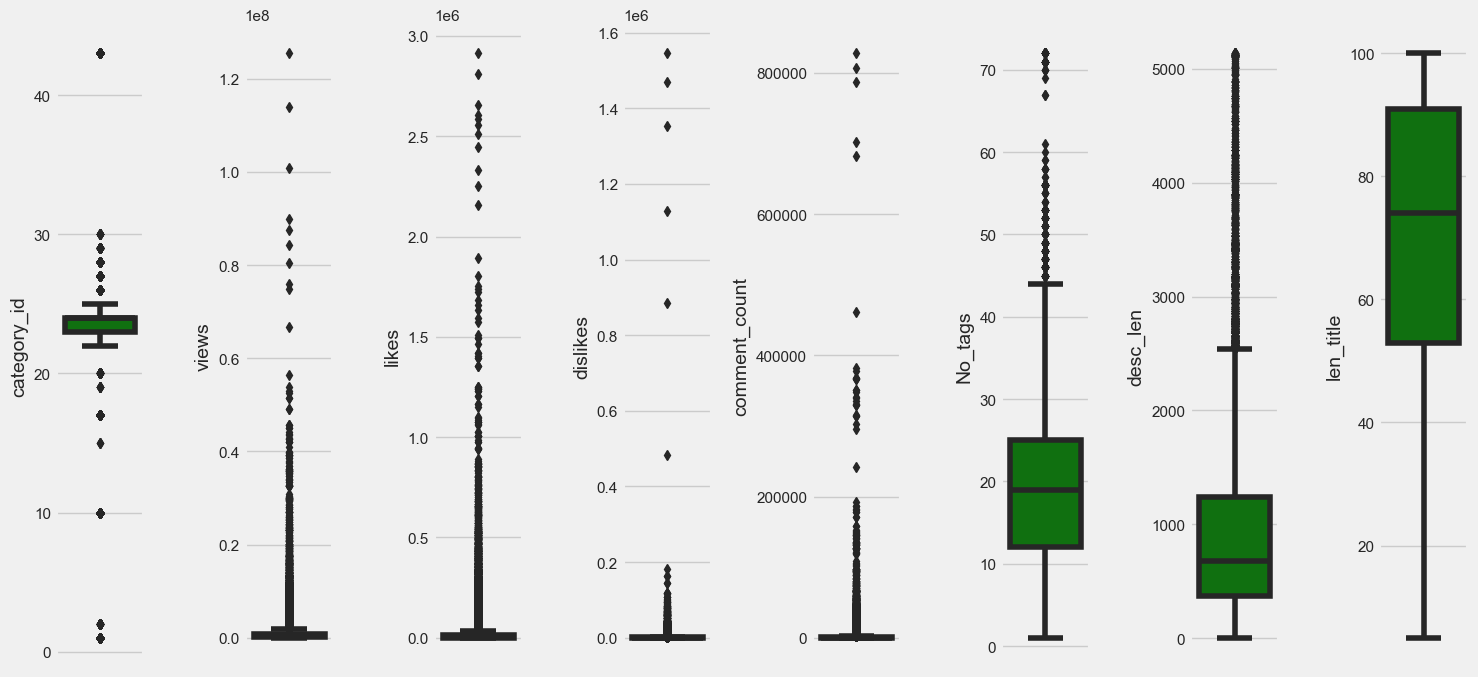

In [18]:
# look at the distribution of data with boxplot
features = ['category_id','views','likes','dislikes','comment_count','No_tags','desc_len','len_title']
plt.figure(figsize=(15, 7))
for i in range(0, len(features)):
    plt.subplot(1, 8, i+1)
    sns.boxplot(y=data[features[i]],color='green',orient='v')
    plt.tight_layout()
plt.savefig('fig/boxplot.png')

It can be seen in the boxplot graph above that the `view`, `likes`, `dislikes`, `comment_count`, `o_tags`, and `desc_len` features have many outliers so that logarithmic transformations are needed for these features.

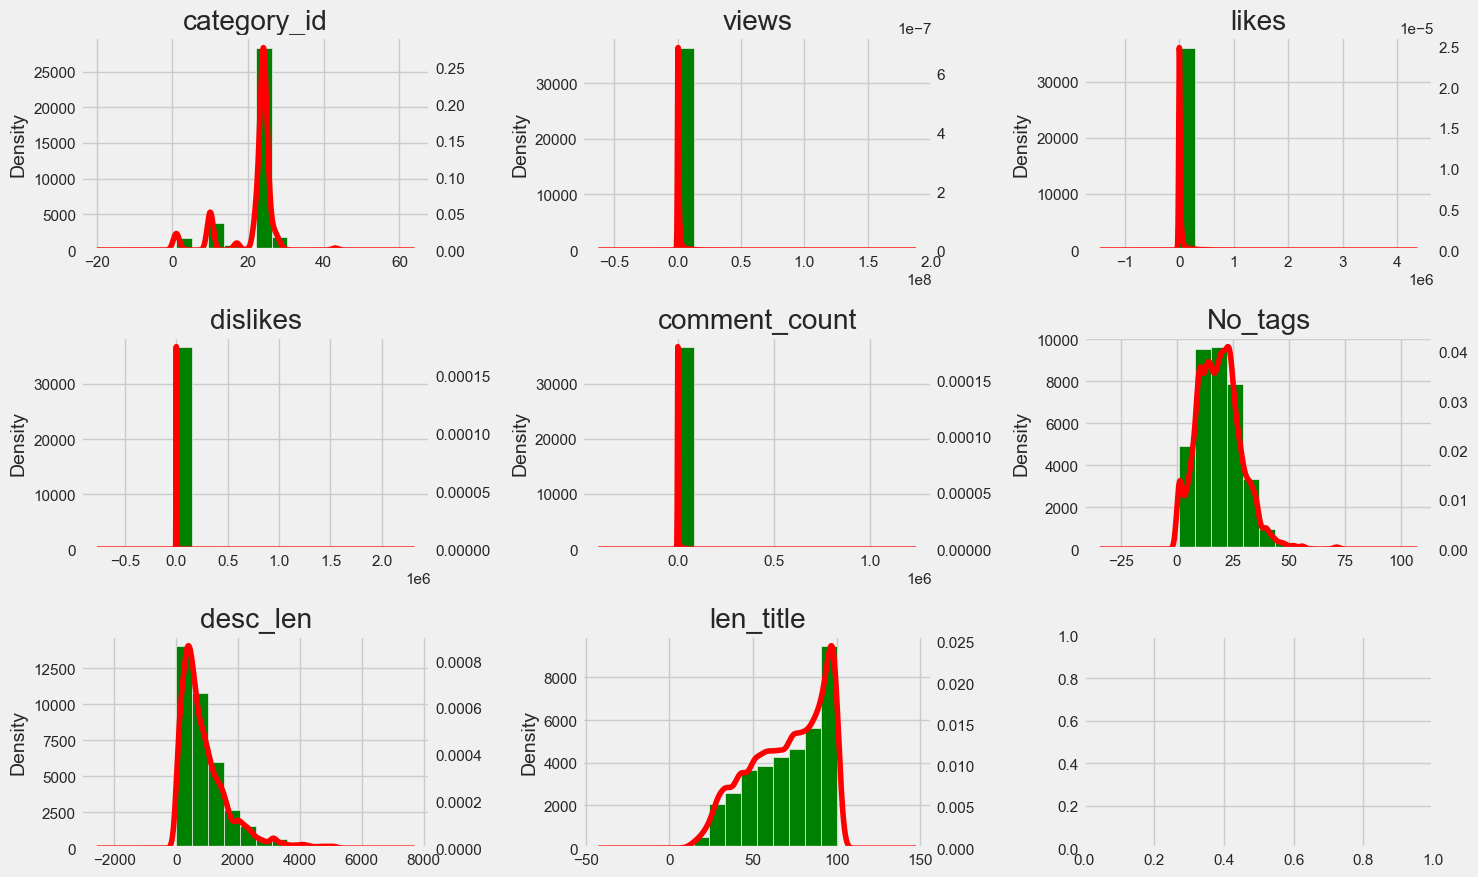

In [20]:
# View data distribution
data_num = data[features]
k = len(data_num.columns)
n = 3
m = (k - 1) // n + 1
fig, axes = plt.subplots(m, n, figsize=(n * 5, m * 3))

# Using items() instead of iteritems()
for i, (name, col) in enumerate(data_num.items()):
    r, c = i // n, i % n
    ax = axes[r, c]
    col.hist(ax=ax, color='green')
    ax2 = col.plot.kde(ax=ax, secondary_y=True, title=name, color='red')
    ax2.set_ylim(0)

fig.tight_layout()
plt.savefig('fig/distribusi data.png')


In the data distribution of numerical features, it can be seen that there are several features that are positively skewed and `len_title` feature that is negatively skewed.

In [23]:
#Know the unique value of each categorical data
data_cat_unique = data_cat.nunique().reset_index()
data_cat_unique.columns = ['fitur', 'nilai unik']
data_cat_unique = data_cat_unique.sort_values('nilai unik', ascending=False)
data_cat_unique

,fitur,nilai unik
1,title,16431
5,description,13979
4,tags,12463
3,publish_time,12375
2,channel_title,1390
0,trending_date,205


### Multivariate Analysis

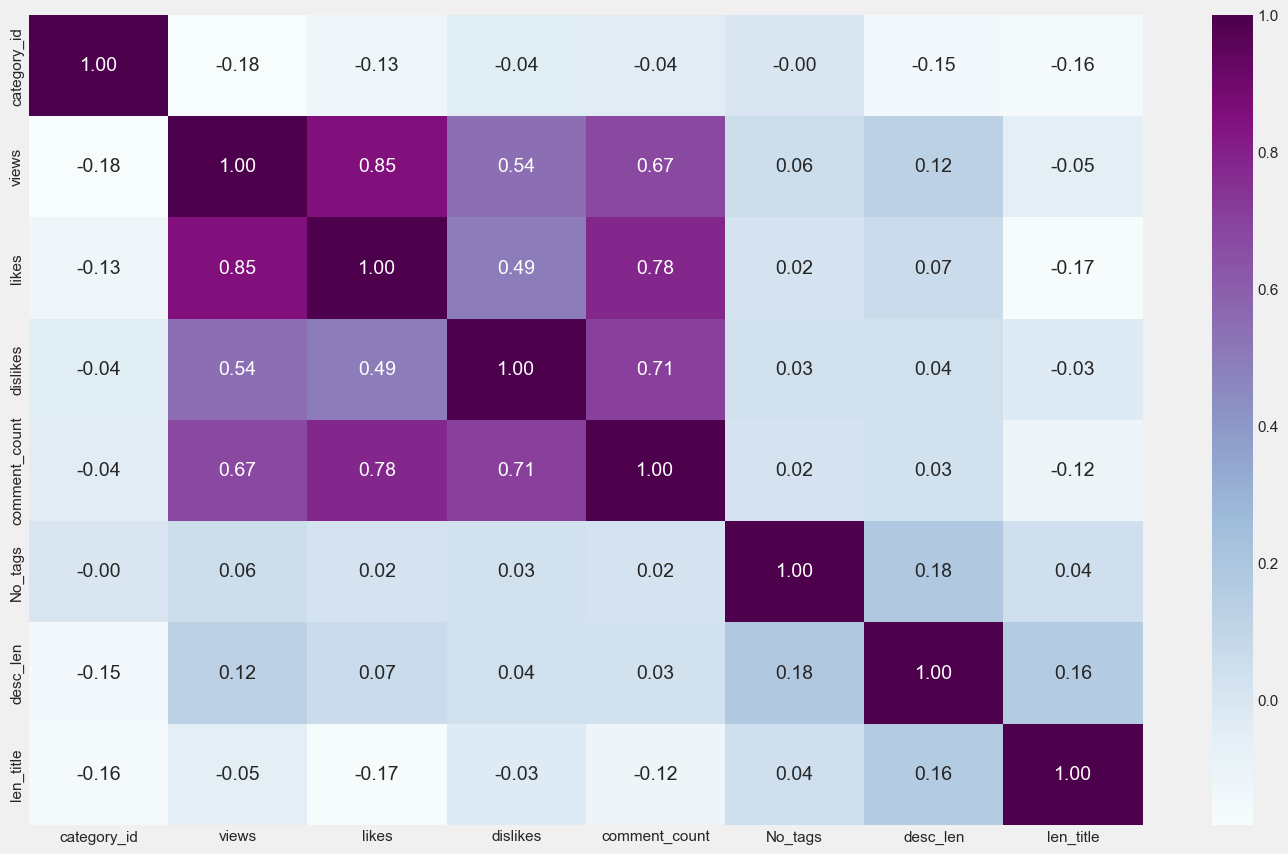

In [24]:
#create a correlation matrix from each numeric data
features = ['category_id','views','likes','dislikes','comment_count','No_tags','desc_len','len_title']
corr_= data[features].corr()
plt.figure(figsize=(16,10))
sns.heatmap(corr_, annot=True, fmt = ".2f", cmap = "BuPu")
plt.savefig('fig/heatmap.png');

Three features show a strong positive correlation with `views`: `likes`, `dislikes`, and `comment_count`.

<Figure size 1000x800 with 0 Axes>

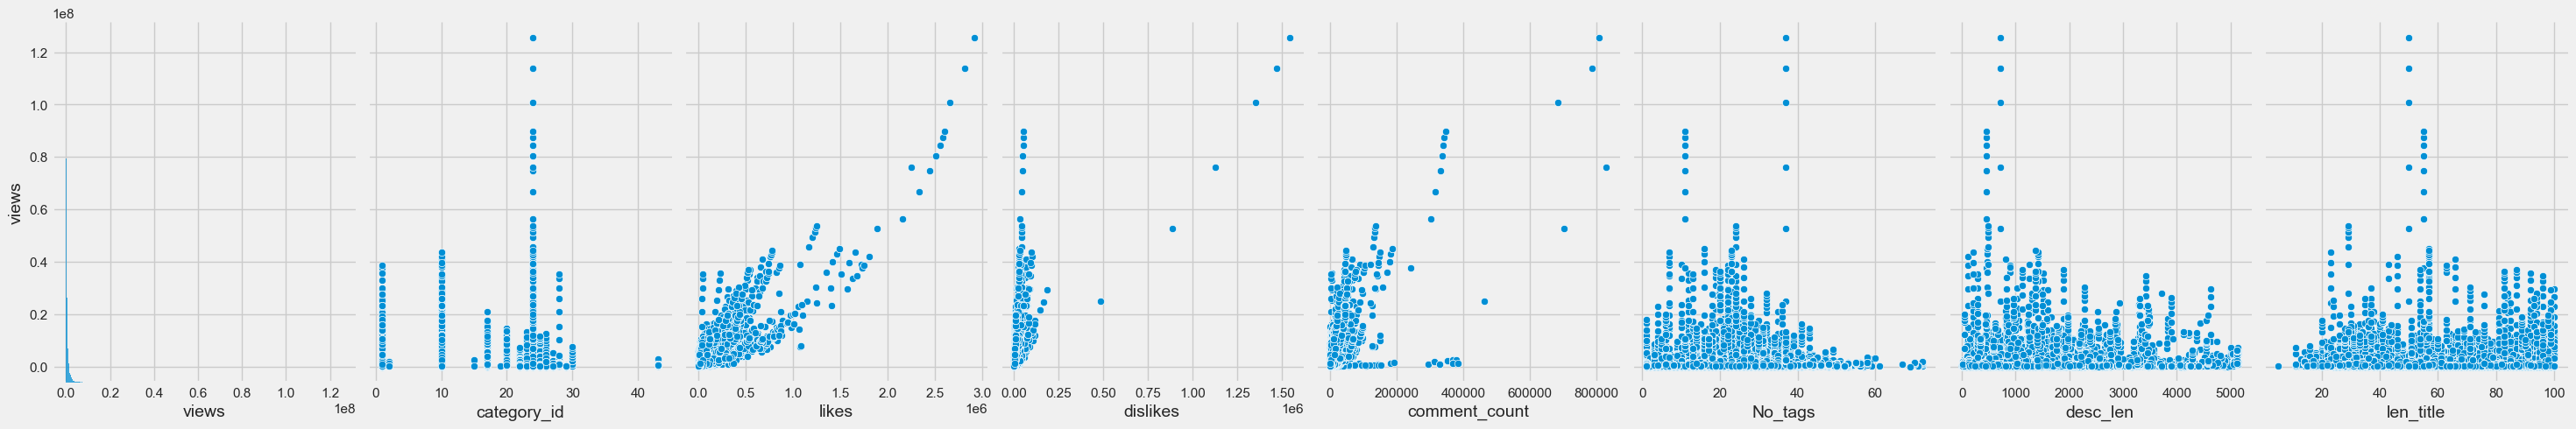

In [25]:
#create a pairplot chart from any numeric data
plt.figure(figsize=(10,8))
sns.pairplot(data=data, x_vars=['views','category_id','likes','dislikes','comment_count','No_tags','desc_len','len_title'], y_vars=['views'], height=5, aspect=0.75)
plt.savefig('fig/pairplot.png')

**EDA** <br>

The boxplot visualizations reveal an uneven data distribution with numerous outliers, and the `No_Tags`, `Desc_len`, and `len_title` features show significant skewness.<br> 

Additionally, the heatmap indicates that several features, such as `likes`, `dislikes`, `comment_count`, `No_tags`, and `desc_len`, have a positive correlation with video views, suggesting that these features might be important for machine learning modeling.<br>

# Data Preparation

In [26]:
# see the number of missing values from the data frame
data_missing_value = data.isnull().sum().reset_index()
data_missing_value.columns = ['feature','missing_value']
data_missing_value

,feature,missing_value
0,trending_date,0
1,title,0
2,channel_title,0
3,category_id,0
4,publish_time,0
5,tags,0
6,views,0
7,likes,0
8,dislikes,0
9,comment_count,0


In [27]:
# see the percentage of missing value for each feature
data_missing_value['percentage'] = round((data_missing_value['missing_value']/len(data))*100,2)
data_missing_value = data_missing_value.sort_values('percentage', ascending=False).reset_index(drop=True)
data_missing_value = data_missing_value[data_missing_value['percentage']>0]
data_missing_value

,feature,missing_value,percentage
0,description,45,0.12


## Drop Column 

In [40]:
#drop category_id, publish_date, description, tags, title, channel_title
data_clean = data.drop(['publish_date','description','title','channel_title','tags', 'publish_time], axis=1)

The category_id, publish_date, description, tags, title, and channel_title features were removed because they contain a high number of unique values, indicating that each row has distinct values.

## Filling Missing Column with Mode

In [41]:
data_clean['comments_disabled'].value_counts()

comments_disabled
False    35611
True      1180
Name: count, dtype: int64

In [42]:
#fill in the comments_disabled value with mode
data_clean['comments_disabled'] = data_clean['comments_disabled'].fillna(data_clean['comments_disabled'].mode()[0])

In [43]:
data_clean['comments_disabled'].value_counts()

comments_disabled
False    35611
True      1180
Name: count, dtype: int64

In [44]:
data_clean['video_error_or_removed'].value_counts()

video_error_or_removed
False    36780
True        11
Name: count, dtype: int64

In [45]:
#fill in the video_error_or_removed value with mode
data_clean['video_error_or_removed'] = data_clean['video_error_or_removed'].fillna(data_clean['video_error_or_removed'].mode()[0])

In [46]:
data_clean['video_error_or_removed'].value_counts()

video_error_or_removed
False    36780
True        11
Name: count, dtype: int64

In [47]:
data_clean['ratings_disabled'].value_counts()

ratings_disabled
False    36034
True       757
Name: count, dtype: int64

In [48]:
#fill in the ratings_disabled value with mode
data_clean['ratings_disabled'] = data_clean['ratings_disabled'].fillna(data_clean['ratings_disabled'].mode()[0])

In [49]:
data_clean['ratings_disabled'].value_counts()

ratings_disabled
False    36034
True       757
Name: count, dtype: int64

## Filling Missing Column 

In [53]:
# Checking for any remaining missing values
missing_values = data_clean.isnull().sum()
print("Remaining Missing Values:\n", missing_values[missing_values > 0])

Remaining Missing Values:
 Series([], dtype: int64)


In [54]:
data_clean.isnull().sum()

trending_date             0
category_id               0
publish_time              0
views                     0
likes                     0
dislikes                  0
comment_count             0
comments_disabled         0
ratings_disabled          0
video_error_or_removed    0
No_tags                   0
desc_len                  0
len_title                 0
dtype: int64

## Duplicate Values

In [55]:
#see the number of duplicate data
data_clean.duplicated().sum()

4229

In [56]:
#drop duplicate data
data_clean = data_clean.drop_duplicates()

In [57]:
#see the number of duplicate data
data_clean.duplicated().sum()

0

## Outliers

Text(0.5, 0, '')

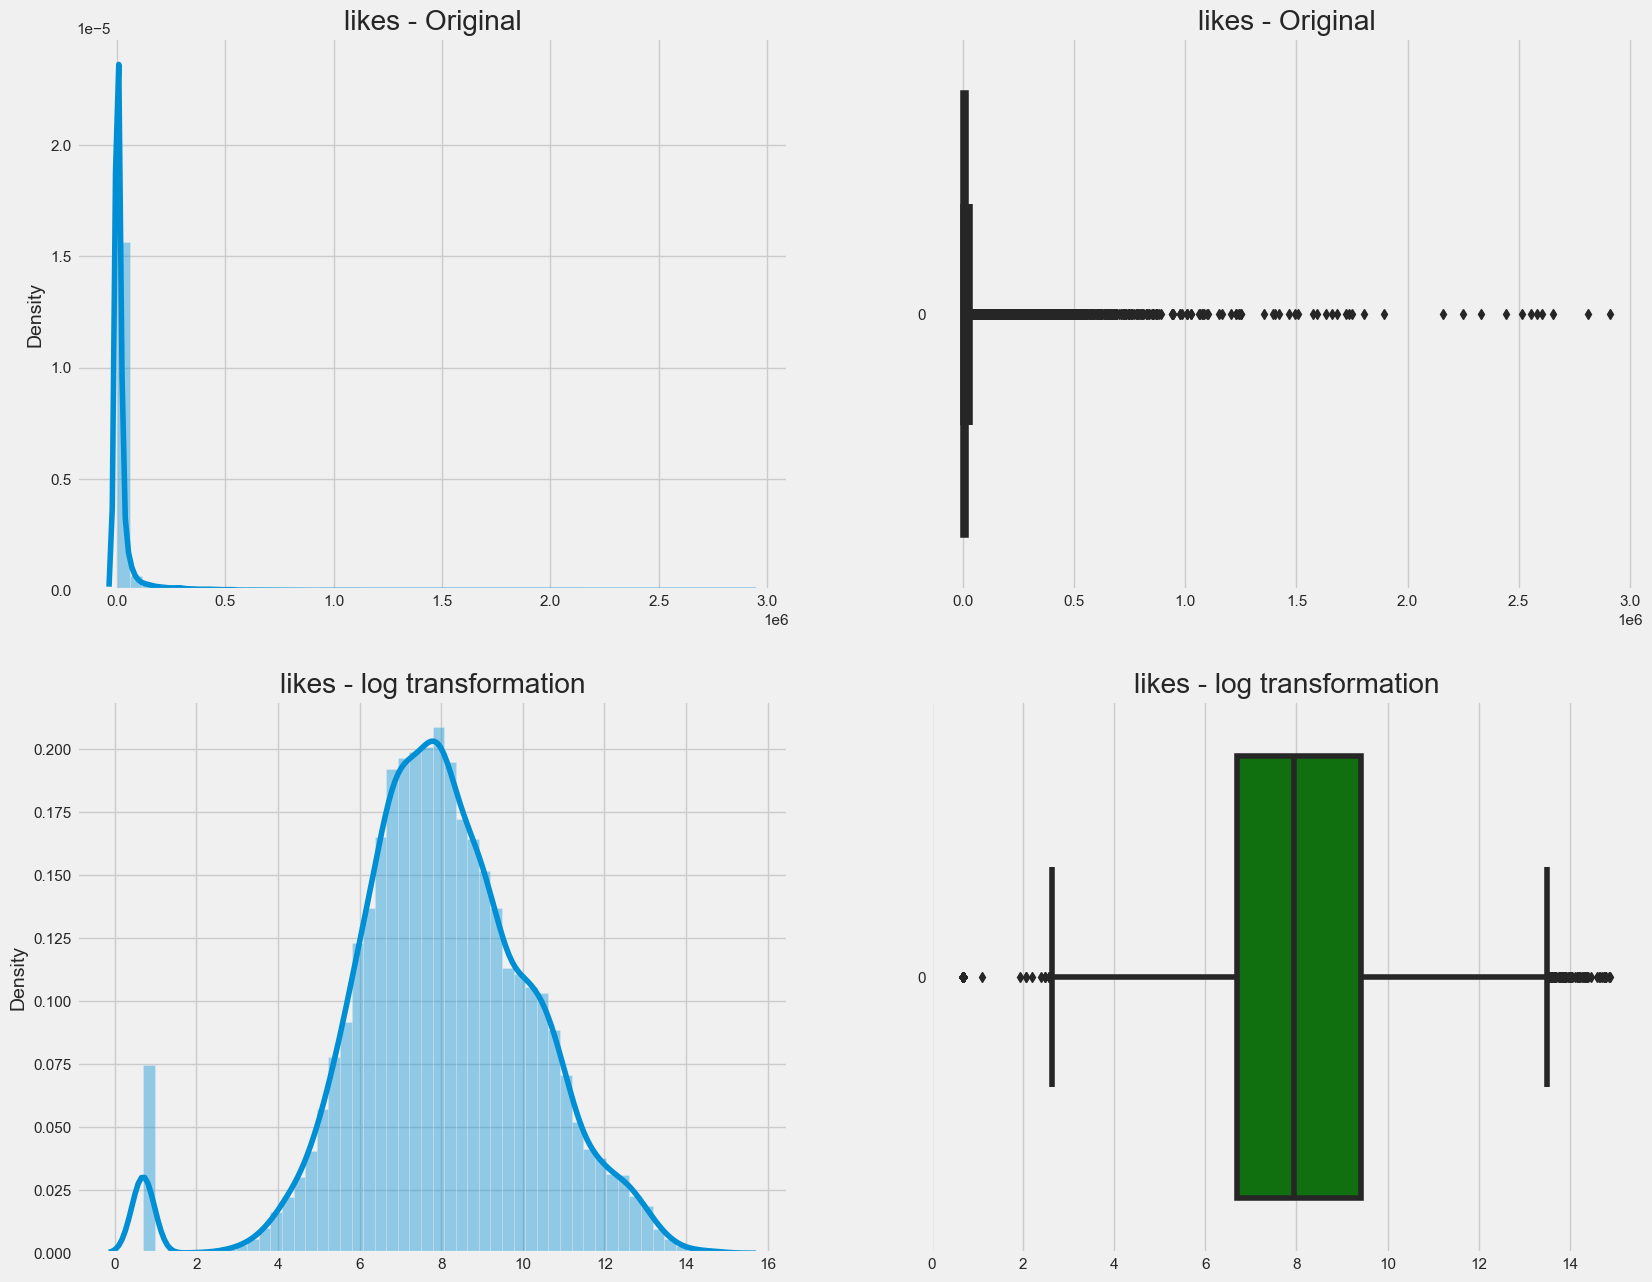

In [58]:
f,ax = plt.subplots(2,2,figsize=(18,15))

g = sns.distplot(data_clean['likes'],kde=True, ax=ax[0,0])
ax[0,0].set_title('likes - Original')
ax[0,0].set_xlabel('')

g = sns.boxplot(data_clean['likes'],color='green',orient='h', ax=ax[0,1])
ax[0,1].set_title('likes - Original')
ax[0,1].set_xlabel('')

g = sns.distplot(np.log1p(data_clean['likes']+1),kde=True, ax=ax[1,0])
ax[1,0].set_title('likes - log transformation')
ax[1,0].set_xlabel('')

g = sns.boxplot(np.log1p(data_clean['likes']+1),color='green',orient='h', ax=ax[1,1])
ax[1,1].set_title('likes - log transformation')
ax[1,1].set_xlabel('')

Text(0.5, 0, '')

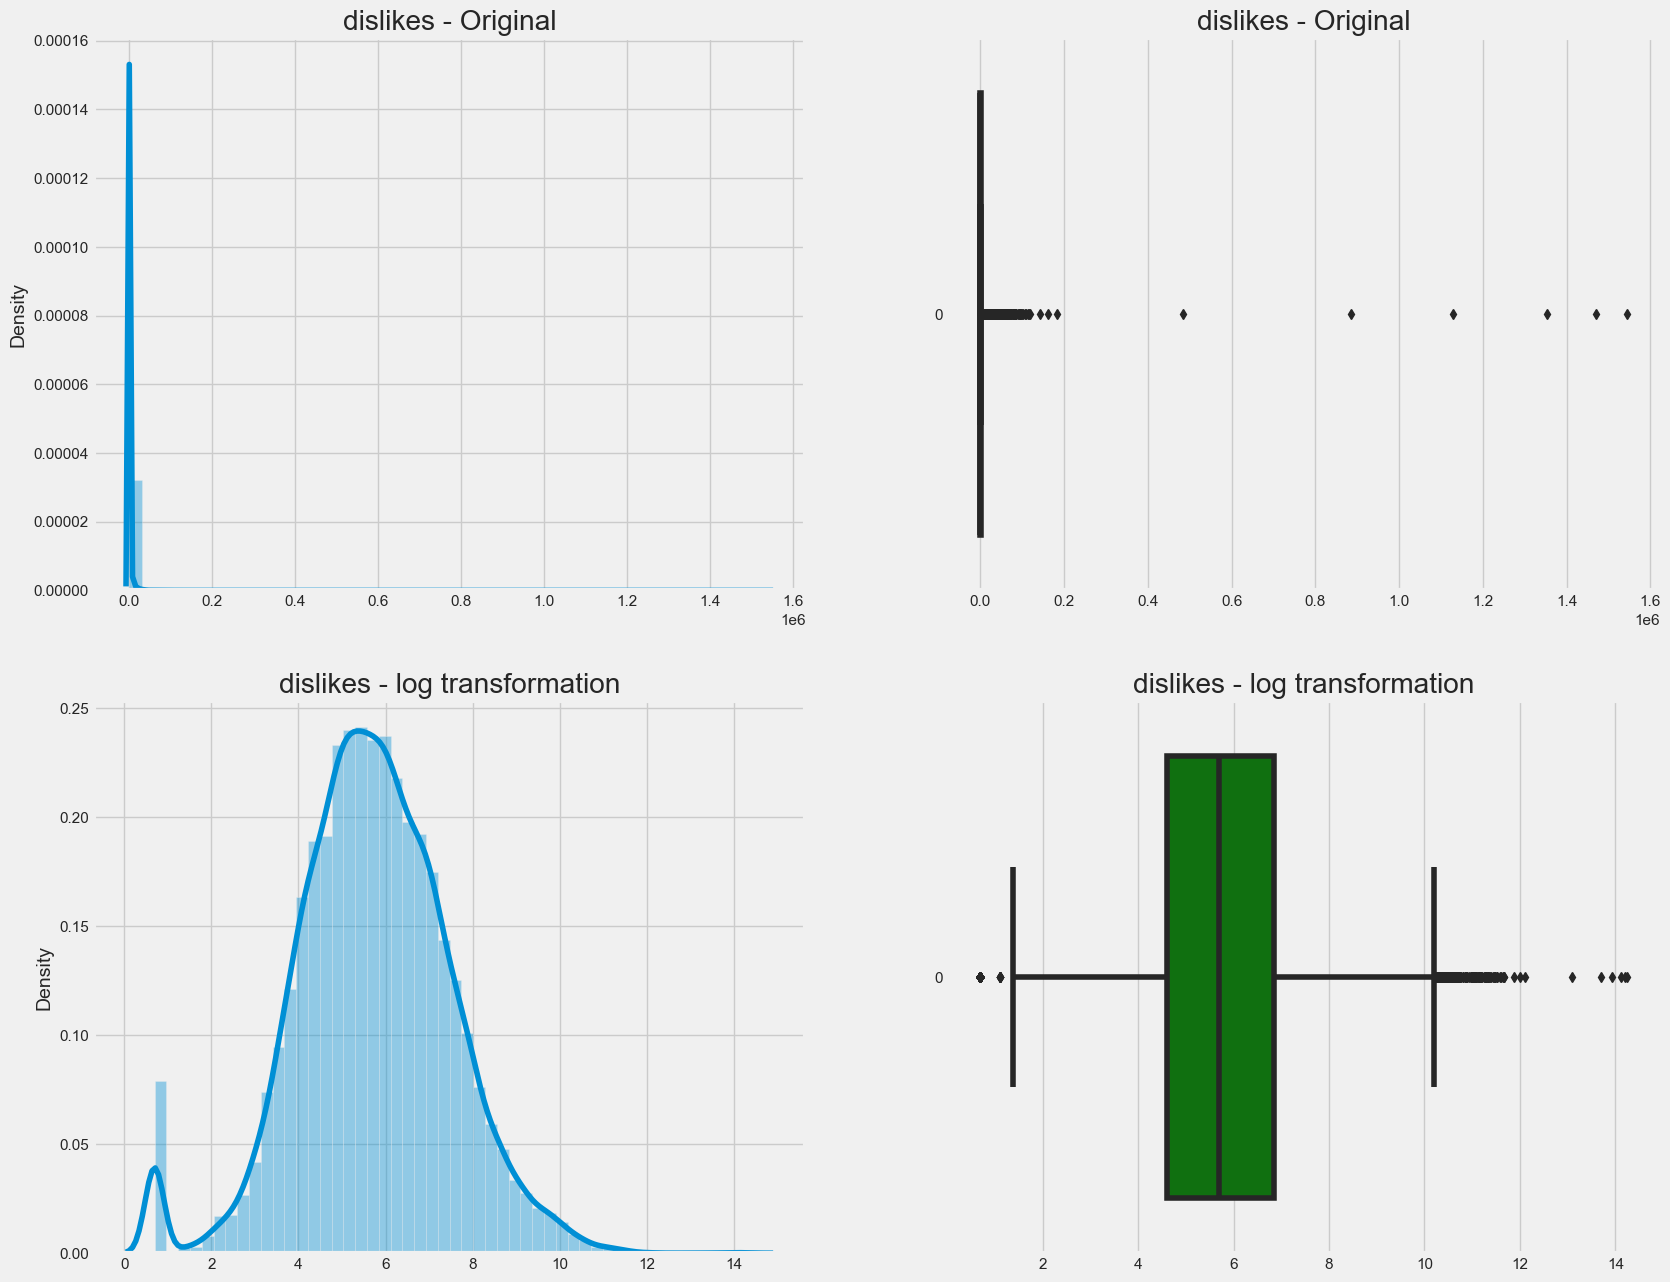

In [59]:
f,ax = plt.subplots(2,2,figsize=(18,15))

g = sns.distplot(data_clean['dislikes'],kde=True, ax=ax[0,0])
ax[0,0].set_title('dislikes - Original')
ax[0,0].set_xlabel('')

g = sns.boxplot(data_clean['dislikes'],color='green',orient='h', ax=ax[0,1])
ax[0,1].set_title('dislikes - Original')
ax[0,1].set_xlabel('')

g = sns.distplot(np.log1p(data_clean['dislikes']+1),kde=True, ax=ax[1,0])
ax[1,0].set_title('dislikes - log transformation')
ax[1,0].set_xlabel('')

g = sns.boxplot(np.log1p(data_clean['dislikes']+1),color='green',orient='h', ax=ax[1,1])
ax[1,1].set_title('dislikes - log transformation')
ax[1,1].set_xlabel('')

Text(0.5, 0, '')

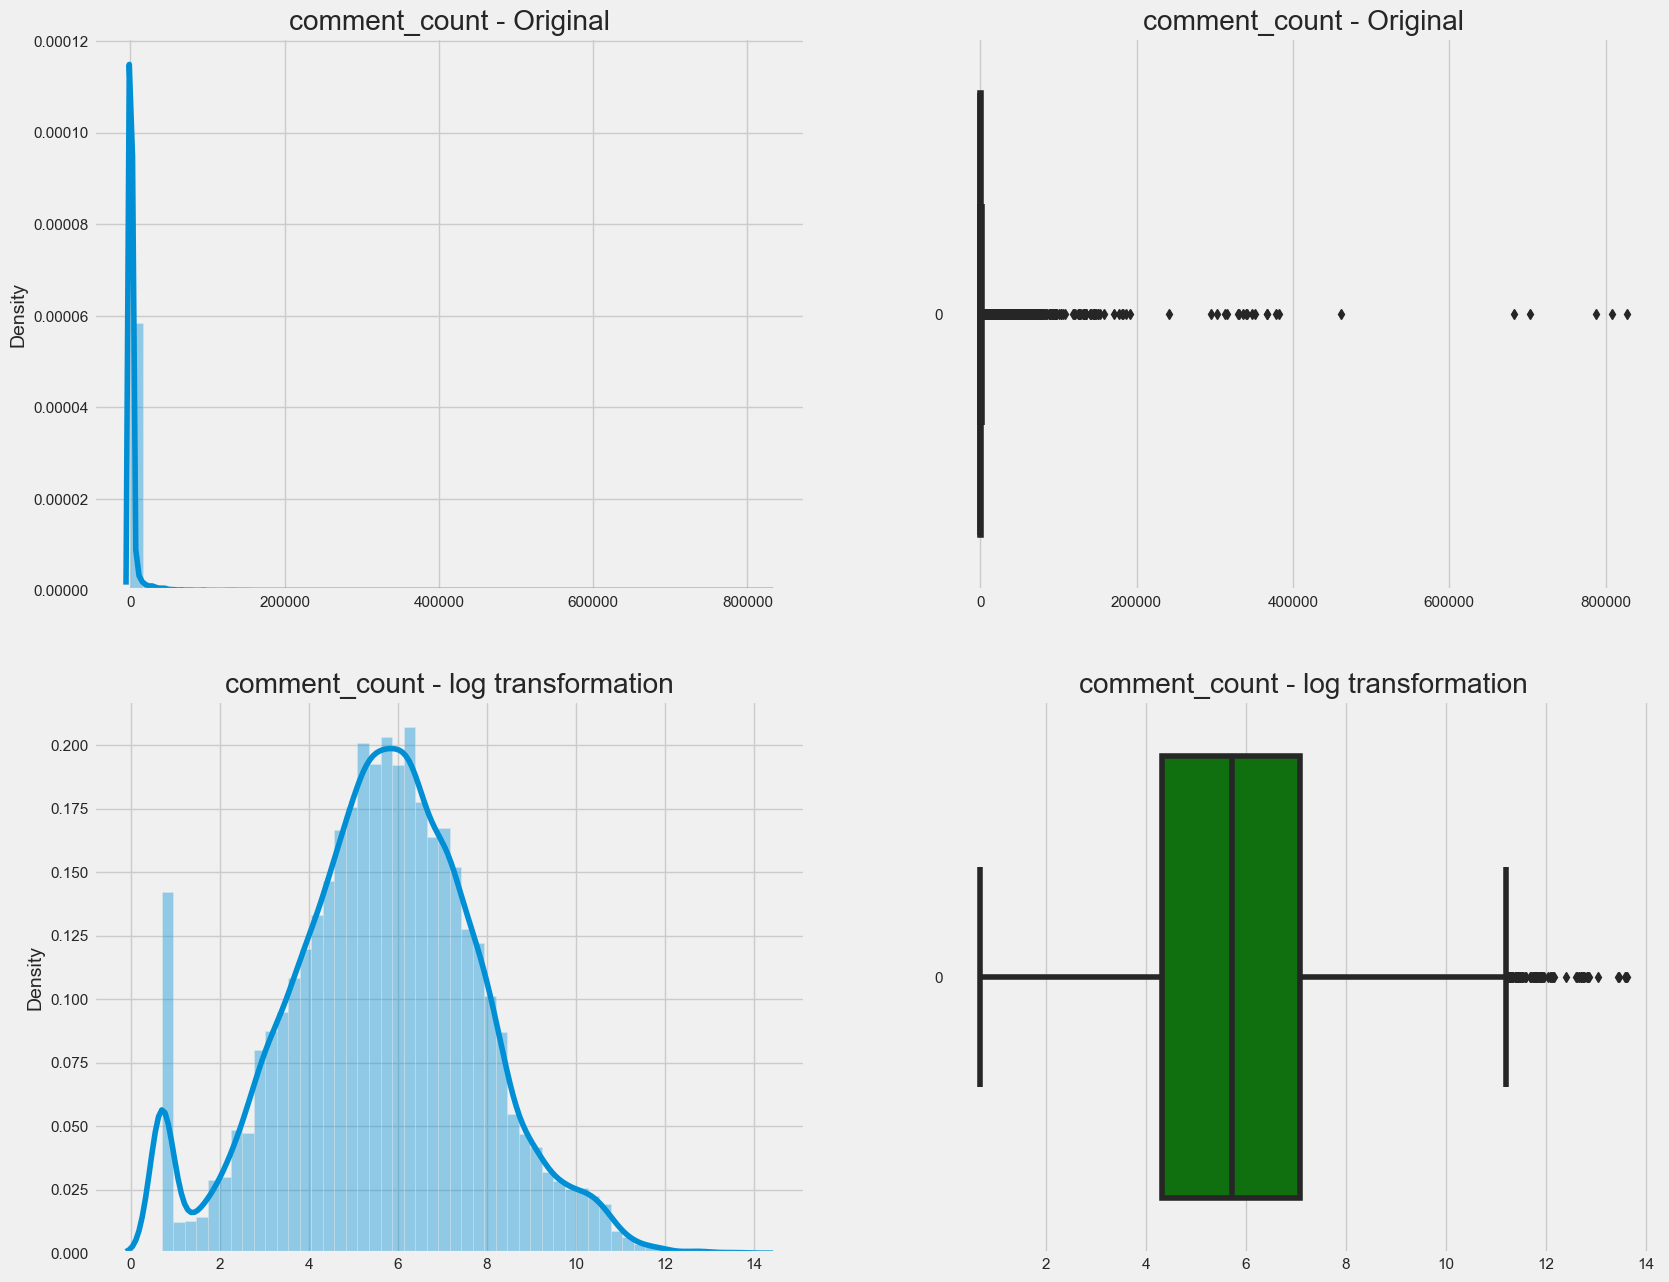

In [60]:
f,ax = plt.subplots(2,2,figsize=(18,15))

g = sns.distplot(data_clean['comment_count'],kde=True, ax=ax[0,0])
ax[0,0].set_title('comment_count - Original')
ax[0,0].set_xlabel('')

g = sns.boxplot(data_clean['comment_count'],color='green',orient='h', ax=ax[0,1])
ax[0,1].set_title('comment_count - Original')
ax[0,1].set_xlabel('')

g = sns.distplot(np.log1p(data_clean['comment_count']+1),kde=True, ax=ax[1,0])
ax[1,0].set_title('comment_count - log transformation')
ax[1,0].set_xlabel('')

g = sns.boxplot(np.log1p(data_clean['comment_count']+1),color='green',orient='h', ax=ax[1,1])
ax[1,1].set_title('comment_count - log transformation')
ax[1,1].set_xlabel('')

Text(0.5, 0, '')

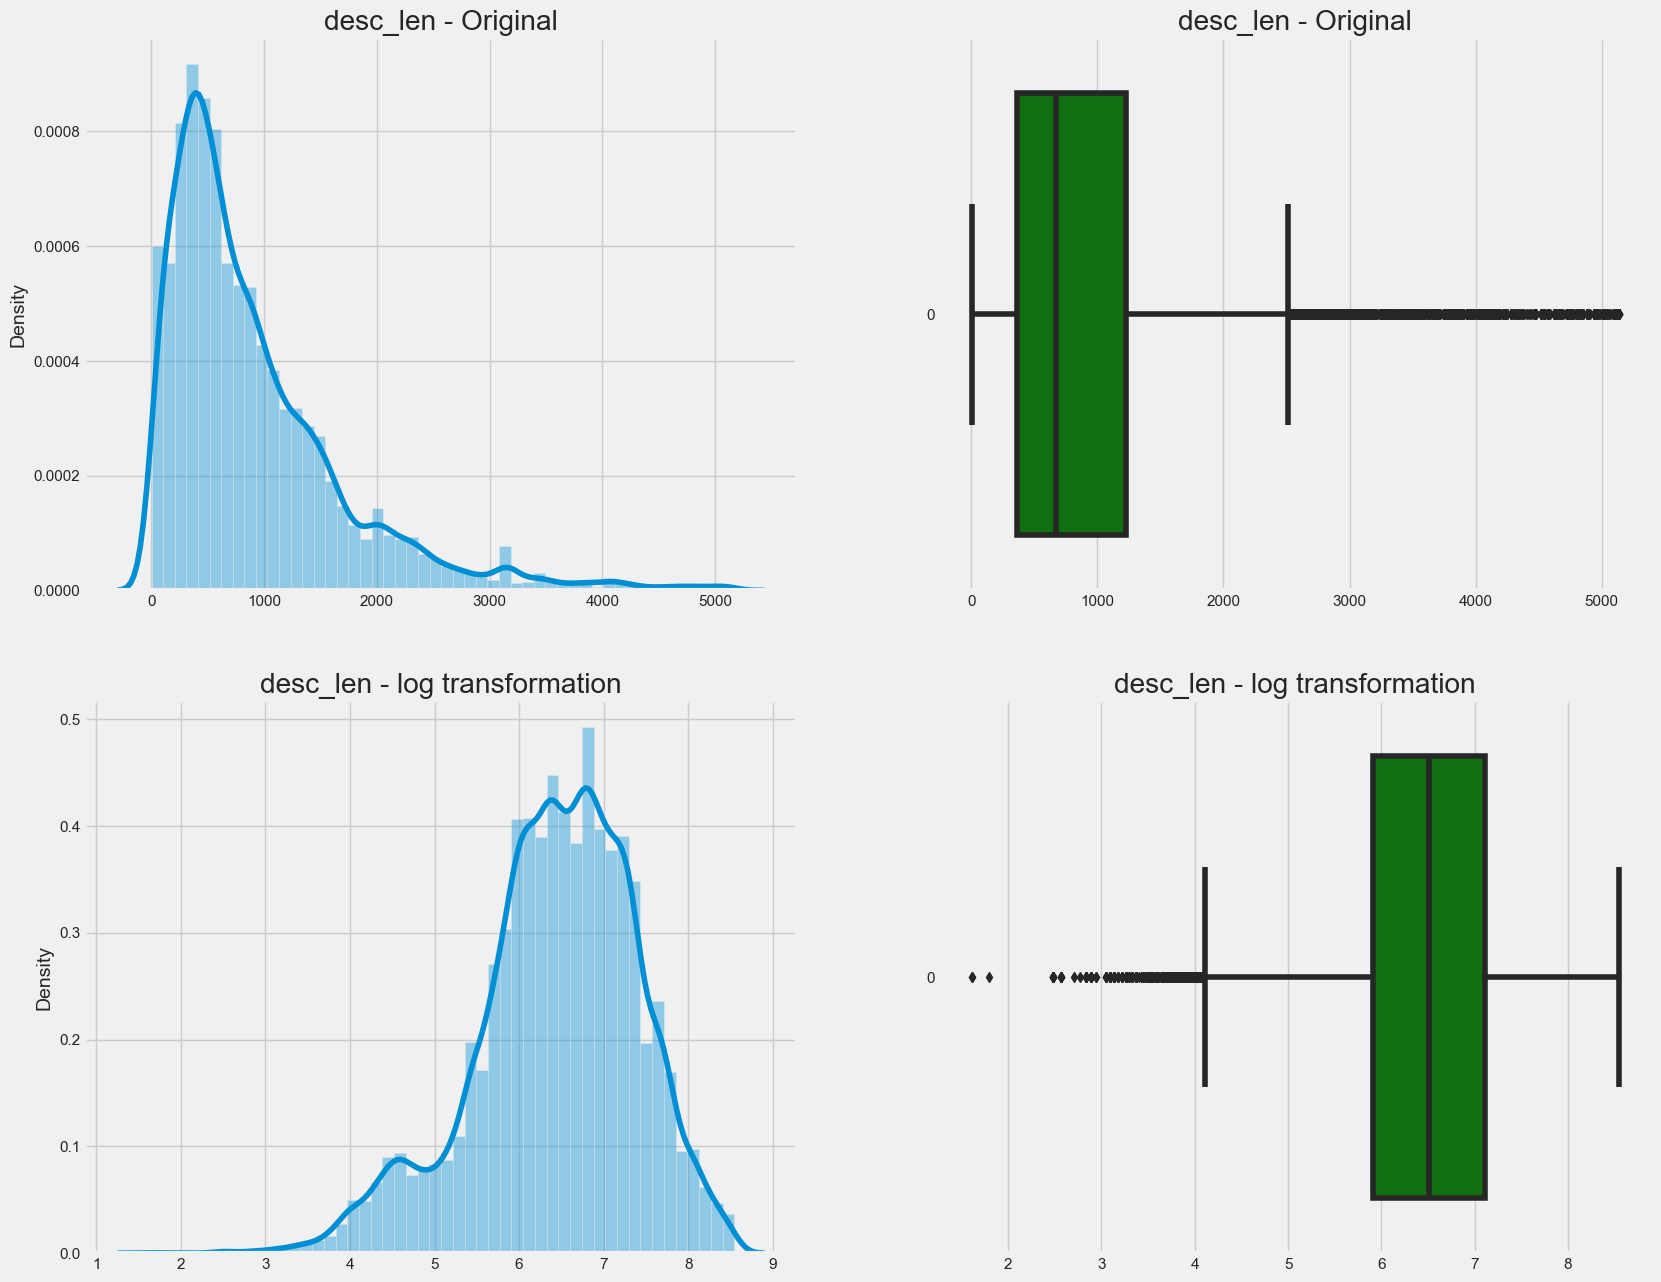

In [61]:
f,ax = plt.subplots(2,2,figsize=(18,15))

g = sns.distplot(data_clean['desc_len'],kde=True, ax=ax[0,0])
ax[0,0].set_title('desc_len - Original')
ax[0,0].set_xlabel('')

g = sns.boxplot(data_clean['desc_len'],color='green',orient='h', ax=ax[0,1])
ax[0,1].set_title('desc_len - Original')
ax[0,1].set_xlabel('')

g = sns.distplot(np.log1p(data_clean['desc_len']+1),kde=True, ax=ax[1,0])
ax[1,0].set_title('desc_len - log transformation')
ax[1,0].set_xlabel('')

g = sns.boxplot(np.log1p(data_clean['desc_len']+1),color='green',orient='h', ax=ax[1,1])
ax[1,1].set_title('desc_len - log transformation')
ax[1,1].set_xlabel('')

Text(0.5, 0, '')

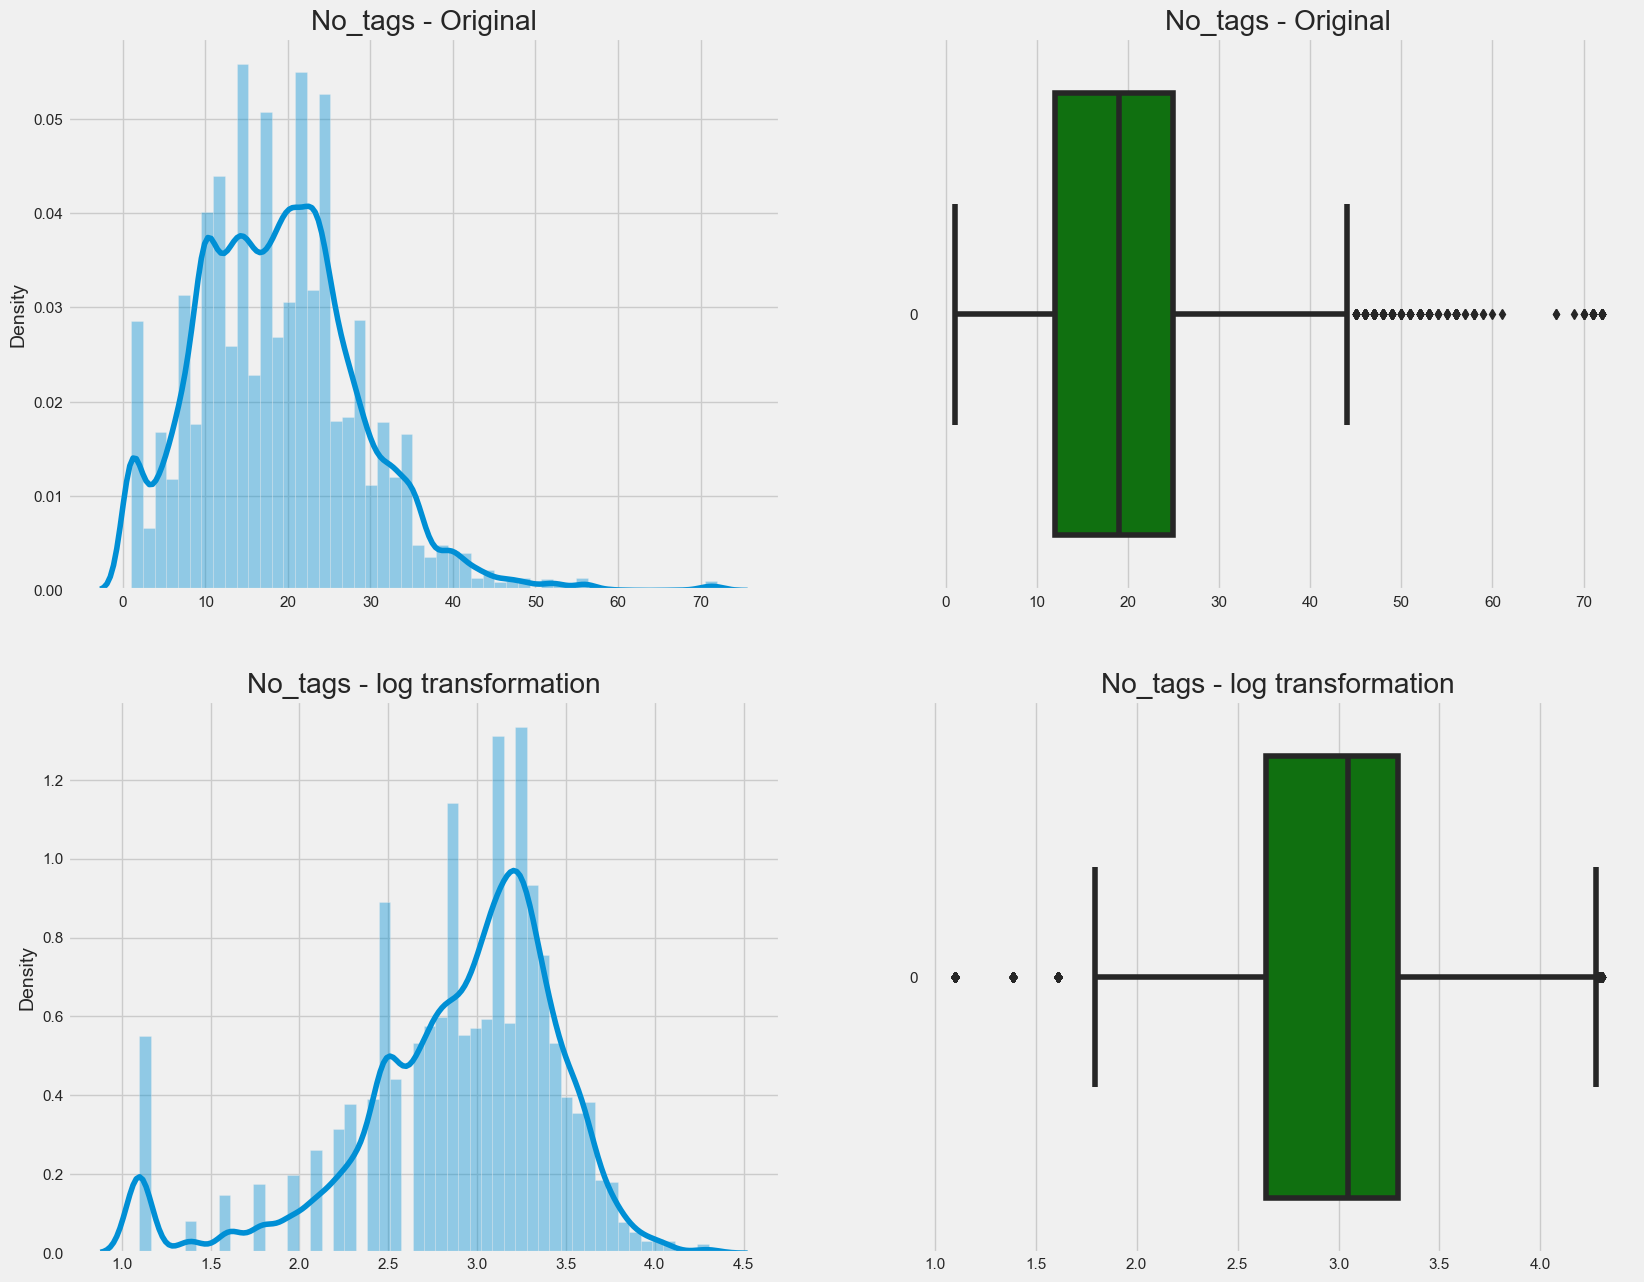

In [62]:
f,ax = plt.subplots(2,2,figsize=(18,15))

g = sns.distplot(data_clean['No_tags'],kde=True, ax=ax[0,0])
ax[0,0].set_title('No_tags - Original')
ax[0,0].set_xlabel('')

g = sns.boxplot(data_clean['No_tags'],color='green',orient='h', ax=ax[0,1])
ax[0,1].set_title('No_tags - Original')
ax[0,1].set_xlabel('')

g = sns.distplot(np.log1p(data_clean['No_tags']+1),kde=True, ax=ax[1,0])
ax[1,0].set_title('No_tags - log transformation')
ax[1,0].set_xlabel('')

g = sns.boxplot(np.log1p(data_clean['No_tags']+1),color='green',orient='h', ax=ax[1,1])
ax[1,1].set_title('No_tags - log transformation')
ax[1,1].set_xlabel('')

Text(0.5, 0, '')

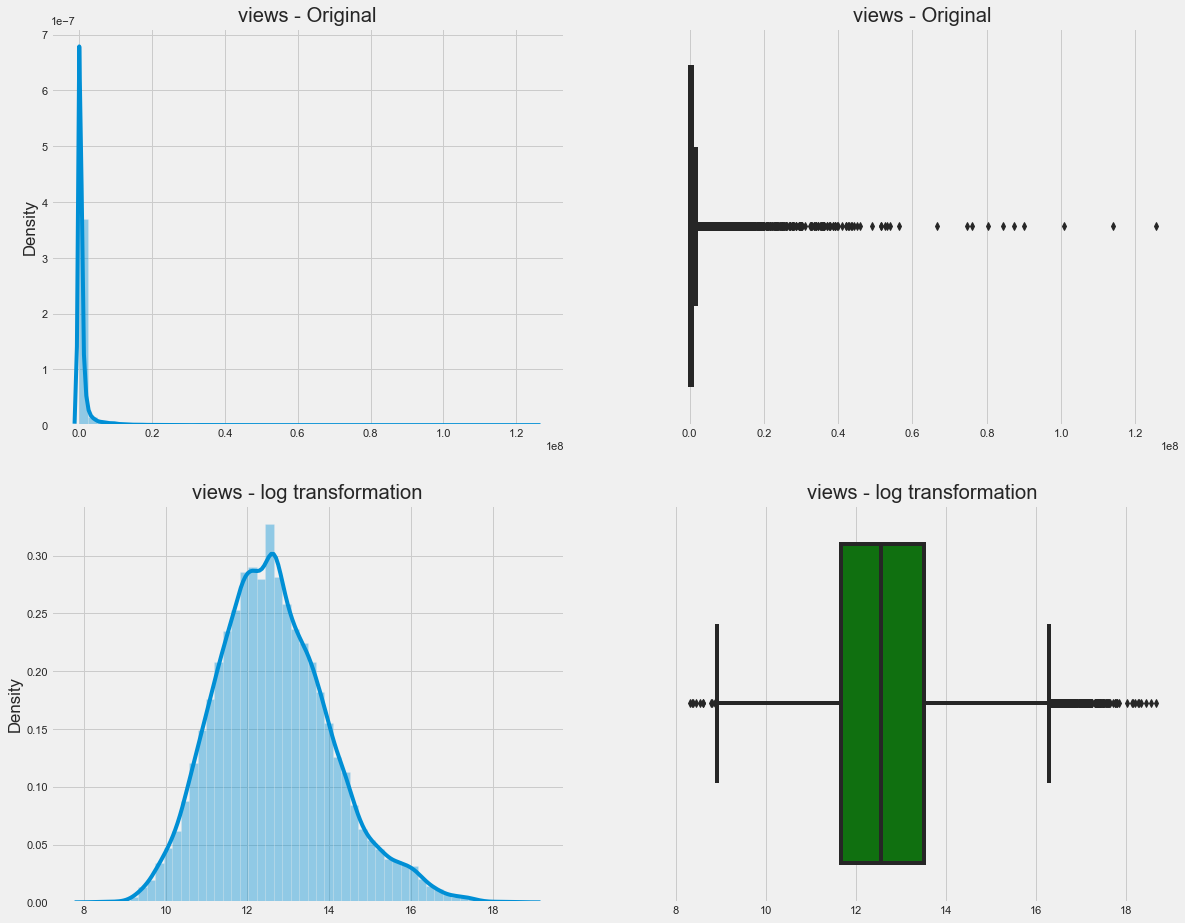

In [38]:
f,ax = plt.subplots(2,2,figsize=(18,15))

g = sns.distplot(data_clean['views'],kde=True, ax=ax[0,0])
ax[0,0].set_title('views - Original')
ax[0,0].set_xlabel('')

g = sns.boxplot(data_clean['views'],color='green',orient='h', ax=ax[0,1])
ax[0,1].set_title('views - Original')
ax[0,1].set_xlabel('')

g = sns.distplot(np.log1p(data_clean['views']+1),kde=True, ax=ax[1,0])
ax[1,0].set_title('views - log transformation')
ax[1,0].set_xlabel('')

g = sns.boxplot(np.log1p(data_clean['views']+1),color='green',orient='h', ax=ax[1,1])
ax[1,1].set_title('views - log transformation')
ax[1,1].set_xlabel('')

In [63]:
features = ['category_id','views','likes','dislikes','comment_count','No_tags','desc_len','len_title']

df_pre = data_clean.copy()
for var in features:
    df_pre['log_'+var]= (data_clean[var]+1).apply(np.log)

## Normalization

In [64]:
for var in features:
    df_pre['std_'+var]= MinMaxScaler().fit_transform(df_pre[var].values.reshape(len(df_pre), 1))

In [65]:
data_clean.describe()

,category_id,views,likes,dislikes,comment_count,No_tags,desc_len,len_title
count,32562.000000,3.256200e+04,3.256200e+04,3.256200e+04,32562.000000,32562.000000,32562.000000,32562.000000
mean,21.602420,1.007091e+06,2.595444e+04,1.596781e+03,2561.672747,18.849057,913.270684,70.995670
std,6.525405,3.171556e+06,9.720113e+04,1.703103e+04,14885.907004,9.863164,807.088596,22.280423
min,1.000000,4.024000e+03,0.000000e+00,0.000000e+00,0.000000,1.000000,3.000000,5.000000
25%,23.000000,1.141622e+05,8.000000e+02,9.900000e+01,74.000000,12.000000,366.000000,54.000000
50%,24.000000,2.777880e+05,2.817000e+03,2.930000e+02,306.000000,19.000000,673.000000,75.000000
75%,24.000000,7.389245e+05,1.229900e+04,9.430000e+02,1188.000000,25.000000,1226.000000,91.000000
max,43.000000,1.254322e+08,2.912710e+06,1.545017e+06,827755.000000,72.000000,5136.000000,100.000000


In [66]:
df_pre.head()

,trending_date,category_id,publish_time,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,...,log_desc_len,log_len_title,std_category_id,std_views,std_likes,std_dislikes,std_comment_count,std_No_tags,std_desc_len,std_len_title
0,2017-11-14,1,12:20:39,1096327,33966,798,882,False,False,False,...,6.825460,4.406719,0.000000,0.008709,0.011661,0.000516,0.001066,0.197183,0.178648,0.800000
1,2017-11-14,25,05:43:56,590101,735,904,0,True,False,False,...,7.711101,4.077537,0.571429,0.004673,0.000252,0.000585,0.000000,0.253521,0.434249,0.557895
2,2017-11-14,24,15:48:08,473988,2011,243,149,False,False,False,...,6.180017,4.077537,0.547619,0.003747,0.000690,0.000157,0.000180,0.183099,0.093318,0.557895
3,2017-11-14,23,07:08:48,1242680,70353,1624,2684,False,False,False,...,5.575949,3.433987,0.523810,0.009875,0.024154,0.001051,0.003243,0.267606,0.050653,0.263158
4,2017-11-14,24,01:14:16,464015,492,293,66,False,False,False,...,6.625392,4.488636,0.547619,0.003667,0.000169,0.000190,0.000080,0.140845,0.146113,0.873684


**Data Preprocessing**

1. **Drop Irrelevant Features**: Removed `publish_date`, `publish_time`, `description`, `tags`, `title`, and `channel_title` as these features have unique values for each video, making them unsuitable for prediction.
2. **Handling Missing Values for Categorical Features**: Filled missing values in `comments_disabled`, `video_error_or_removed`, and `ratings_disabled` using the mode, as these are categorical features and it's more appropriate to fill them with the most frequently occurring values.
3. **Handling Missing Values for Numerical Features**: Used the median to fill missing values in numerical features because it better represents the overall data distribution and is robust to outliers.
4. **Removing Duplicates**: Dropped 4,229 duplicate rows to ensure data quality and prevent redundancy.
5. **Log Transformation**: Applied log transformation to numerical features to convert skewed distributions to a more normal or near-normal distribution.
6. **Normalization**: Standardized the scale of each numerical feature to ensure consistency and facilitate the model’s learning process.

# Split Train & Test

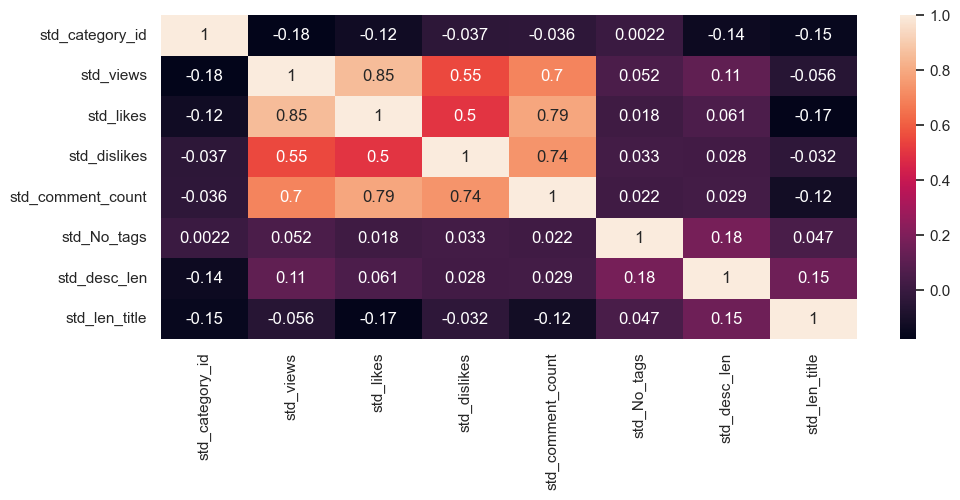

In [67]:
sns.set(rc={'figure.figsize':(10,4)})
sns.heatmap(df_pre[['std_category_id','std_views','std_likes','std_dislikes','std_comment_count','std_No_tags','std_desc_len','std_len_title']].corr(), annot=True)
plt.savefig('fig/split train test.png')

In [68]:
x = df_pre[['std_category_id','std_likes','std_dislikes','std_comment_count','std_No_tags','std_desc_len','std_len_title']] 
y = df_pre['std_views']

In [69]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.2, random_state=42) #Splitting the data into Train and Test

## Fit Model Simple Linear Regression

Fitting model to train set

In [70]:
#Fitting simple linear regression to the Training Set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(xtrain, ytrain)

LinearRegression()

## Predict

Predict the test set

In [71]:
pred = regressor.predict(xtest) #Predicting the views

In [72]:
np.exp(pred).round() # inverse log transform

array([1., 1., 1., ..., 1., 1., 1.])

## Evaluation

In [73]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
def eval_regression(model, pred, xtrain, ytrain, xtest, ytest):
    print("MAE: %.2f" % mean_absolute_error(ytest, pred)) # The MAE
    print("RMSE: %.2f" % mean_squared_error(ytest, pred, squared=False)) # The RMSE
    print('R2 score: %.2f' % r2_score(ytest, pred)) # Explained variance score: 1 is perfect prediction

In [74]:
pred = regressor.predict(xtest)

print('Coefficients: \n', regressor.coef_) # The slope
print('Intercept: \n', regressor.intercept_) # The Intercept

eval_regression(regressor, pred, xtrain, ytrain, xtest,ytest)

Coefficients: 
 [-0.00902089  0.64657896  0.53437326 -0.21403023  0.00395174  0.00615419
  0.00689205]
Intercept: 
 -0.00012201303293153318
MAE: 0.01
RMSE: 0.01
R2 score: 0.78


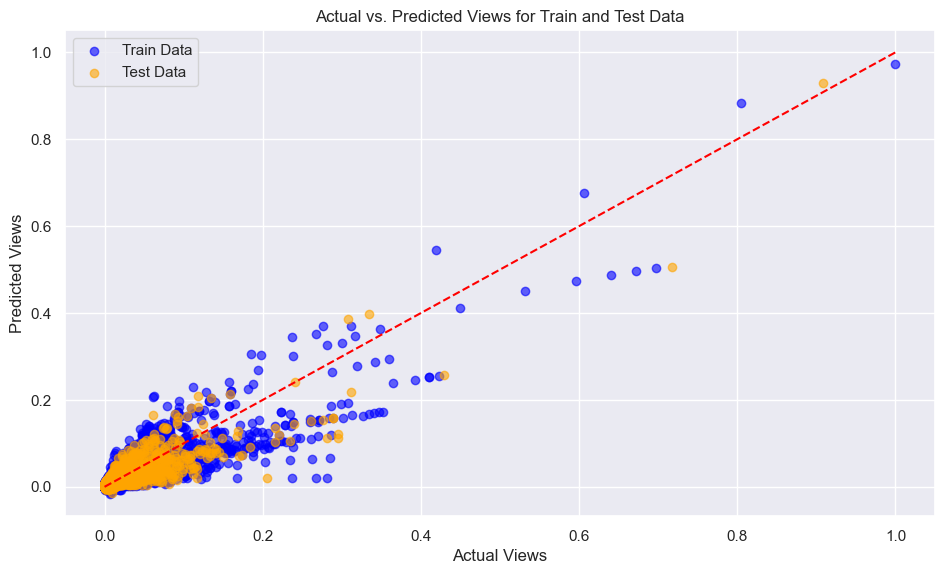

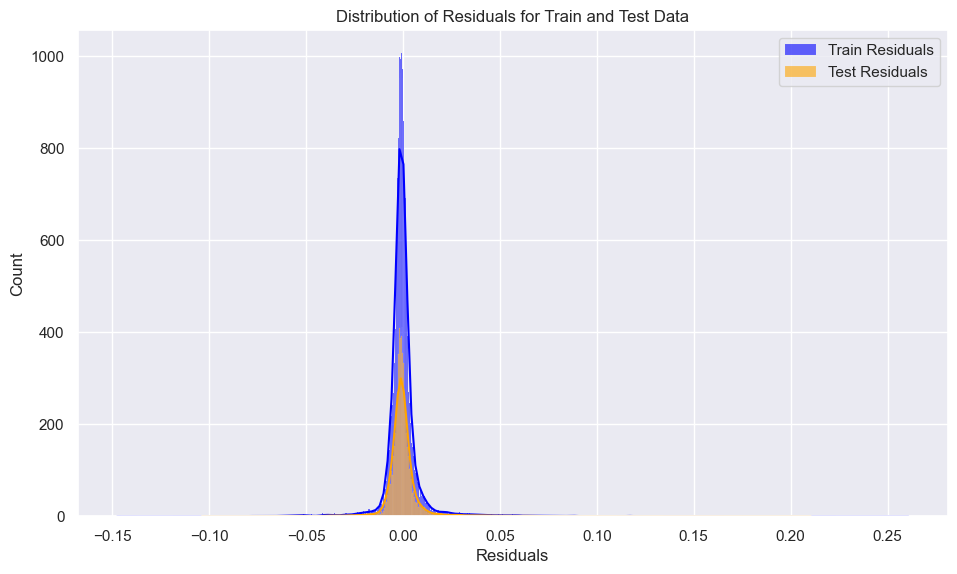

In [108]:
import matplotlib.pyplot as plt
import seaborn as sns

# Predict using the fitted regression model for both training and test sets
train_pred = regressor.predict(xtrain)
test_pred = regressor.predict(xtest)

# 1. Actual vs. Predicted Plot for Train and Test Data
plt.figure(figsize=(10, 6))
plt.scatter(ytrain, train_pred, color='blue', alpha=0.6, label='Train Data')
plt.scatter(ytest, test_pred, color='orange', alpha=0.6, label='Test Data')
plt.plot([min(ytrain.min(), ytest.min()), max(ytrain.max(), ytest.max())],
         [min(ytrain.min(), ytest.min()), max(ytrain.max(), ytest.max())], color='red', linestyle='--')  # y = x line
plt.xlabel('Actual Views')
plt.ylabel('Predicted Views')
plt.title('Actual vs. Predicted Views for Train and Test Data')
plt.legend()
plt.grid(True)
plt.show()

# 2. Residual Plot for Train and Test Data
train_residuals = ytrain - train_pred
test_residuals = ytest - test_pred

plt.figure(figsize=(10, 6))
sns.histplot(train_residuals, kde=True, color='blue', label='Train Residuals', alpha=0.6)
sns.histplot(test_residuals, kde=True, color='orange', label='Test Residuals', alpha=0.6)
plt.xlabel('Residuals')
plt.title('Distribution of Residuals for Train and Test Data')
plt.legend()
plt.grid(True)
plt.show()


# Ridge

In [75]:
from sklearn.linear_model import Ridge
ridge_model = Ridge()
ridge_model.fit(xtrain, ytrain)

Ridge()

In [76]:
pred = ridge_model.predict(xtest)

print('Coefficients: \n', ridge_model.coef_) # The slope
print('Intercept: \n', ridge_model.intercept_) # The Intercept

eval_regression(ridge_model, pred, xtrain, ytrain, xtest, ytest)

Coefficients: 
 [-1.07902343e-02  5.73412504e-01  2.84753301e-01 -3.11460497e-05
  4.21451401e-03  6.69915568e-03  6.45365342e-03]
Intercept: 
 0.0011322654425278238
MAE: 0.01
RMSE: 0.01
R2 score: 0.77


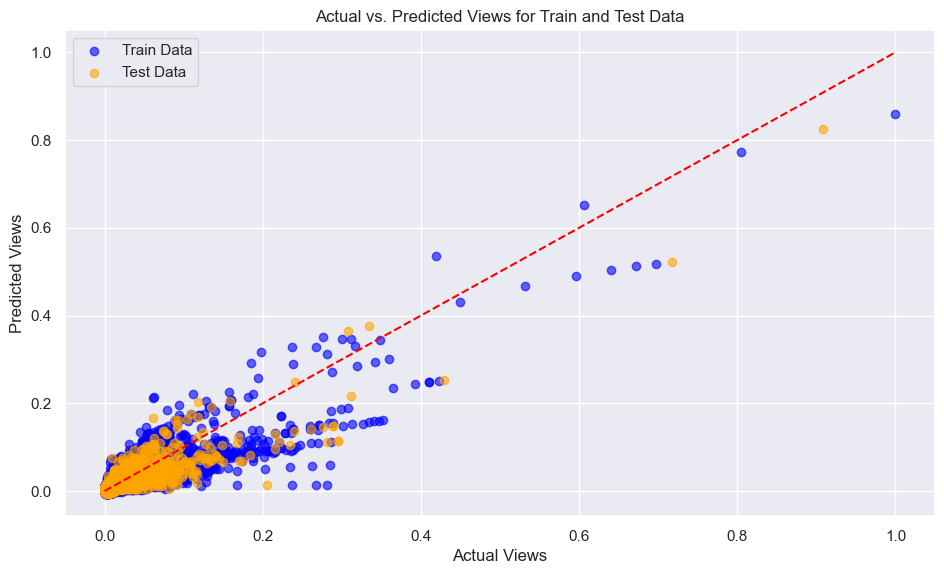

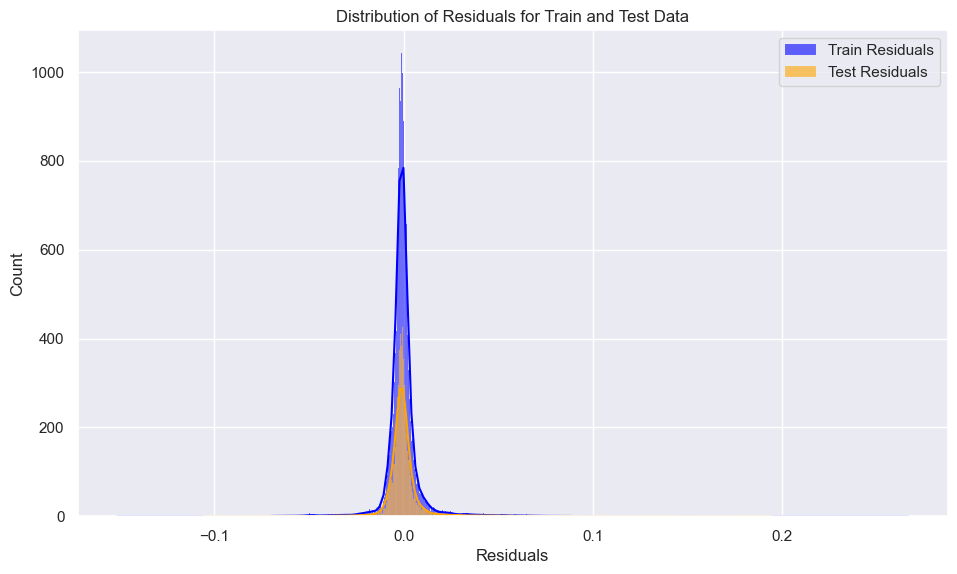

In [109]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure that the Ridge model is fitted and predictions are made
ridge_model.fit(xtrain, ytrain)

# Predict on both the training and testing data
train_pred = ridge_model.predict(xtrain)
test_pred = ridge_model.predict(xtest)

# 1. Actual vs. Predicted Values Plot for Train and Test Data
plt.figure(figsize=(10, 6))
plt.scatter(ytrain, train_pred, color='blue', alpha=0.6, label='Train Data')
plt.scatter(ytest, test_pred, color='orange', alpha=0.6, label='Test Data')
plt.plot([min(ytrain.min(), ytest.min()), max(ytrain.max(), ytest.max())],
         [min(ytrain.min(), ytest.min()), max(ytrain.max(), ytest.max())], color='red', linestyle='--')  # y = x line
plt.xlabel('Actual Views')
plt.ylabel('Predicted Views')
plt.title('Actual vs. Predicted Views for Train and Test Data')
plt.legend()
plt.grid(True)
plt.show()

# 2. Residual Plot for Train and Test Data
train_residuals = ytrain - train_pred
test_residuals = ytest - test_pred

plt.figure(figsize=(10, 6))
sns.histplot(train_residuals, kde=True, color='blue', label='Train Residuals', alpha=0.6)
sns.histplot(test_residuals, kde=True, color='orange', label='Test Residuals', alpha=0.6)
plt.xlabel('Residuals')
plt.title('Distribution of Residuals for Train and Test Data')
plt.legend()
plt.grid(True)
plt.show()


## Randomized Search

In [98]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import Ridge
import numpy as np

# Create polynomial features to capture non-linear relationships
poly = PolynomialFeatures(degree=2, include_bias=False)
xtrain_poly = poly.fit_transform(xtrain)
xtest_poly = poly.transform(xtest)

# Scaling the polynomial features
scaler = StandardScaler()
xtrain_scaled = scaler.fit_transform(xtrain_poly)
xtest_scaled = scaler.transform(xtest_poly)

# Define a broader range of alpha values
alpha_range = np.logspace(-4, 4, 50)  # From 1e-4 to 1e4 with 50 points
hyperparameters = dict(alpha=alpha_range)

# Initialize Ridge Regression model
ridge_model = Ridge()

# Use RandomizedSearchCV for hyperparameter tuning
clf = RandomizedSearchCV(ridge_model, hyperparameters, cv=5, random_state=42, scoring='r2', n_iter=50)  # Increased n_iter

# Fit the model using scaled data
best_model = clf.fit(xtrain_scaled, ytrain)

# Predict and evaluate
pred = best_model.predict(xtest_scaled)
eval_regression(best_model, pred, xtrain_scaled, ytrain, xtest_scaled, ytest)


MAE: 0.00
RMSE: 0.01
R2 score: 0.85


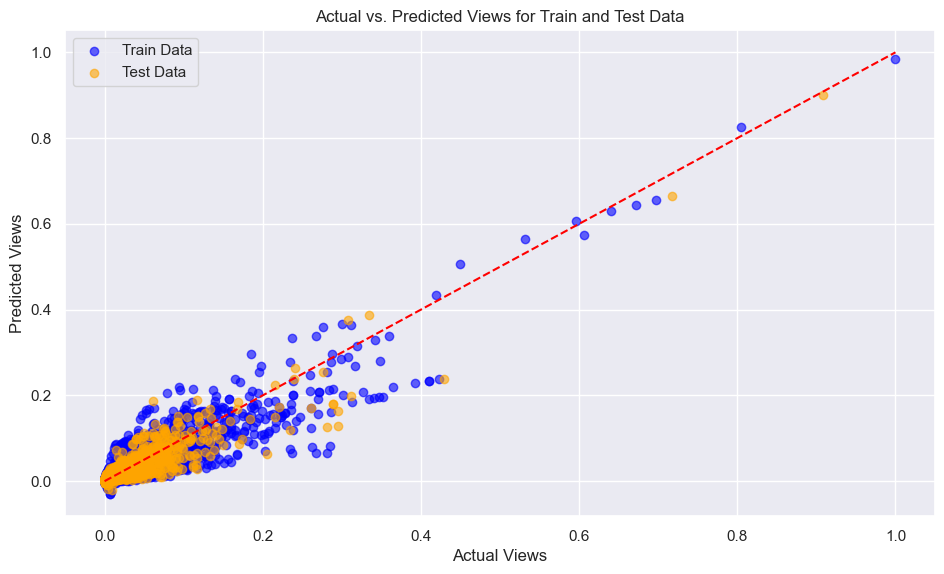

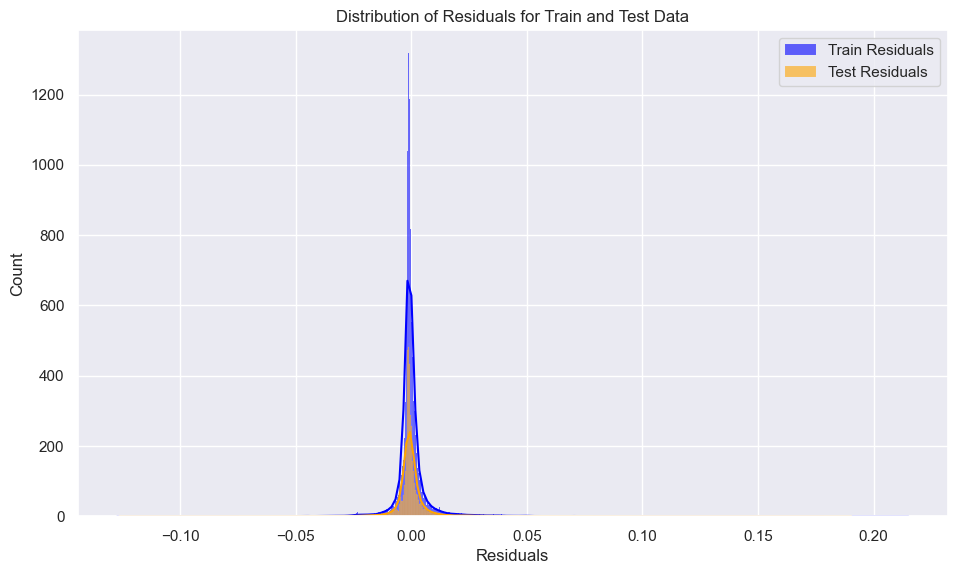

In [110]:
import matplotlib.pyplot as plt
import seaborn as sns

# Predict using the best Ridge Regression model for both training and testing sets
train_pred = best_model.predict(xtrain_scaled)
test_pred = best_model.predict(xtest_scaled)

# 1. Actual vs. Predicted Values Plot for Train and Test Data
plt.figure(figsize=(10, 6))
plt.scatter(ytrain, train_pred, color='blue', alpha=0.6, label='Train Data')
plt.scatter(ytest, test_pred, color='orange', alpha=0.6, label='Test Data')
plt.plot([min(ytrain.min(), ytest.min()), max(ytrain.max(), ytest.max())],
         [min(ytrain.min(), ytest.min()), max(ytrain.max(), ytest.max())], color='red', linestyle='--')  # y = x line
plt.xlabel('Actual Views')
plt.ylabel('Predicted Views')
plt.title('Actual vs. Predicted Views for Train and Test Data')
plt.legend()
plt.grid(True)
plt.show()

# 2. Residual Plot for Train and Test Data
train_residuals = ytrain - train_pred
test_residuals = ytest - test_pred

plt.figure(figsize=(10, 6))
sns.histplot(train_residuals, kde=True, color='blue', label='Train Residuals', alpha=0.6)
sns.histplot(test_residuals, kde=True, color='orange', label='Test Residuals', alpha=0.6)
plt.xlabel('Residuals')
plt.title('Distribution of Residuals for Train and Test Data')
plt.legend()
plt.grid(True)
plt.show()


# Lasso

In [99]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
import numpy as np

# Scaling the data
scaler = StandardScaler()
xtrain_scaled = scaler.fit_transform(xtrain)
xtest_scaled = scaler.transform(xtest)

# Define the hyperparameters to tune
alpha_range = np.logspace(-4, 4, 50)  # From 1e-4 to 1e4
hyperparameters = dict(alpha=alpha_range)

# Initialize Lasso Regression model
lasso_model = Lasso(max_iter=10000)  # Increase max_iter to ensure convergence

# Use RandomizedSearchCV for hyperparameter tuning
clf = RandomizedSearchCV(lasso_model, hyperparameters, cv=5, random_state=42, scoring='r2', n_iter=50)  # Increased n_iter to 50

# Fit the model using scaled data
best_lasso_model = clf.fit(xtrain_scaled, ytrain)

# Predict and evaluate
lasso_pred = best_lasso_model.predict(xtest_scaled)
eval_regression(best_lasso_model, lasso_pred, xtrain_scaled, ytrain, xtest_scaled, ytest)

# Display best hyperparameters and evaluation metrics
print(f"Best Alpha: {best_lasso_model.best_params_['alpha']}")


MAE: 0.01
RMSE: 0.01
R2 score: 0.78
Best Alpha: 0.0001


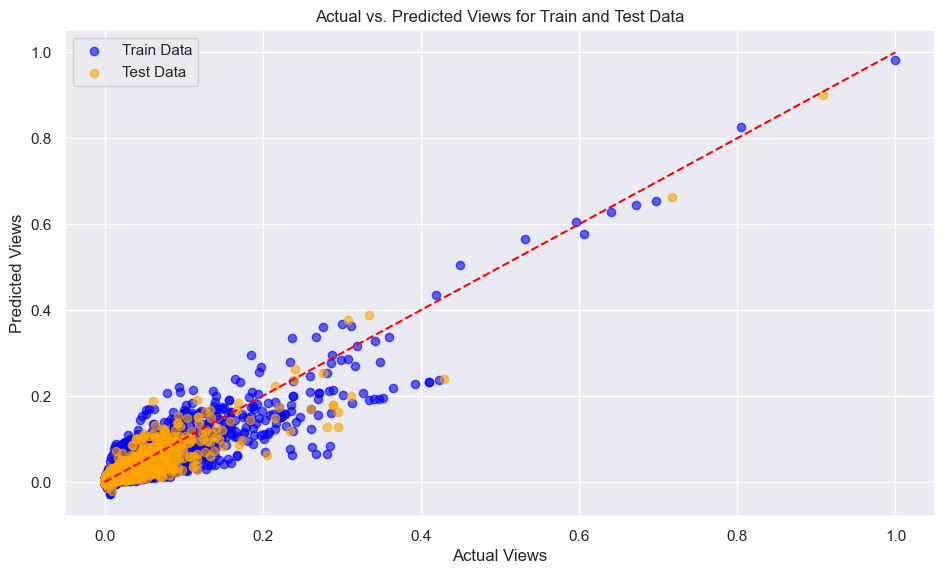

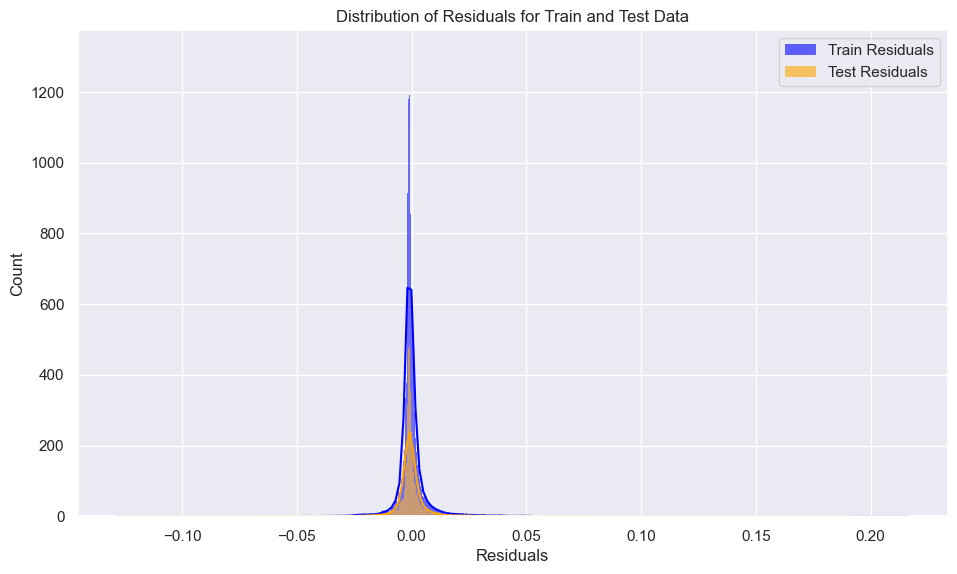

In [111]:
import matplotlib.pyplot as plt
import seaborn as sns

# Predict on both training and test data using the best Lasso model
train_pred = best_lasso_model.predict(xtrain_scaled)
test_pred = best_lasso_model.predict(xtest_scaled)

# 1. Actual vs. Predicted Values Plot for Train and Test Data
plt.figure(figsize=(10, 6))
plt.scatter(ytrain, train_pred, color='blue', alpha=0.6, label='Train Data')
plt.scatter(ytest, test_pred, color='orange', alpha=0.6, label='Test Data')
plt.plot([min(ytrain.min(), ytest.min()), max(ytrain.max(), ytest.max())],
         [min(ytrain.min(), ytest.min()), max(ytrain.max(), ytest.max())], color='red', linestyle='--')  # y = x line
plt.xlabel('Actual Views')
plt.ylabel('Predicted Views')
plt.title('Actual vs. Predicted Views for Train and Test Data')
plt.legend()
plt.grid(True)
plt.show()

# 2. Residual Plot for Train and Test Data
train_residuals = ytrain - train_pred
test_residuals = ytest - test_pred

plt.figure(figsize=(10, 6))
sns.histplot(train_residuals, kde=True, color='blue', label='Train Residuals', alpha=0.6)
sns.histplot(test_residuals, kde=True, color='orange', label='Test Residuals', alpha=0.6)
plt.xlabel('Residuals')
plt.title('Distribution of Residuals for Train and Test Data')
plt.legend()
plt.grid(True)
plt.show()


# Decision Tree

In [90]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor()
dt.fit(xtrain, ytrain)
pred = dt.predict(xtest)
eval_regression(dt, pred, xtrain, ytrain, xtest, ytest)

MAE: 0.00
RMSE: 0.01
R2 score: 0.94


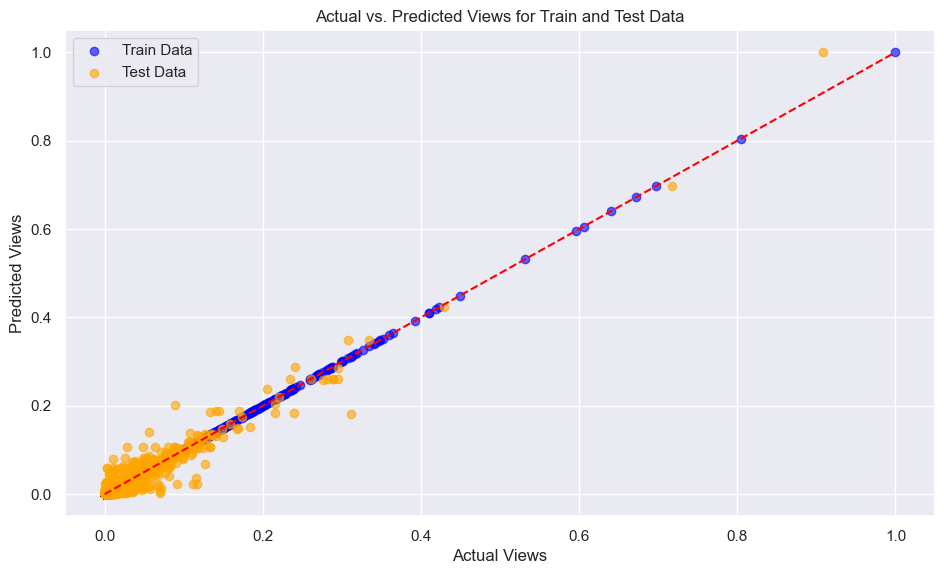

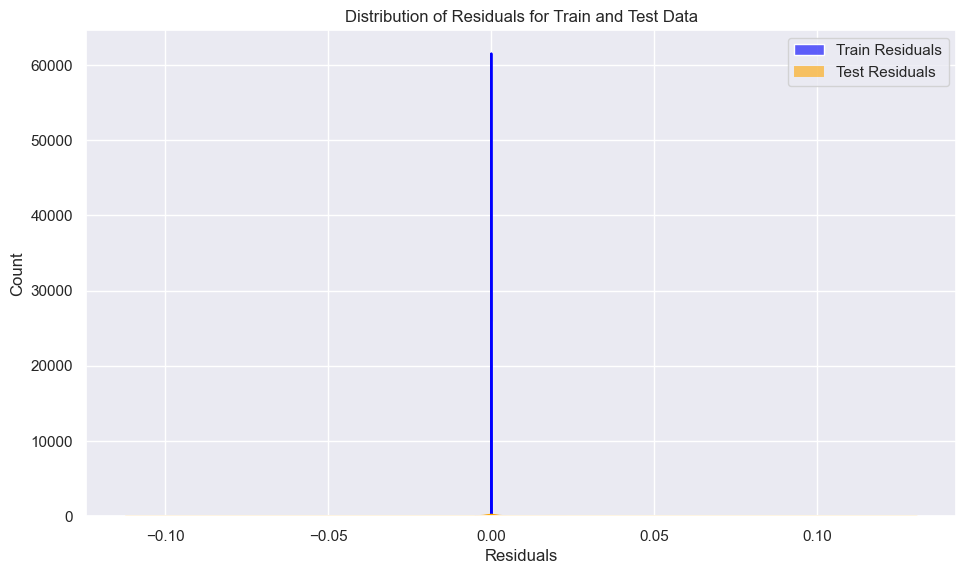

In [113]:
import matplotlib.pyplot as plt
import seaborn as sns

# Predict on both training and test sets using the Decision Tree model
train_pred = dt.predict(xtrain)
test_pred = dt.predict(xtest)

# 1. Actual vs. Predicted Values Plot for Train and Test Data
plt.figure(figsize=(10, 6))
plt.scatter(ytrain, train_pred, color='blue', alpha=0.6, label='Train Data')
plt.scatter(ytest, test_pred, color='orange', alpha=0.6, label='Test Data')
plt.plot([min(ytrain.min(), ytest.min()), max(ytrain.max(), ytest.max())],
         [min(ytrain.min(), ytest.min()), max(ytrain.max(), ytest.max())], color='red', linestyle='--')  # y = x line
plt.xlabel('Actual Views')
plt.ylabel('Predicted Views')
plt.title('Actual vs. Predicted Views for Train and Test Data')
plt.legend()
plt.grid(True)
plt.show()

# 2. Residuals Plot for Train and Test Data
train_residuals = ytrain - train_pred
test_residuals = ytest - test_pred

plt.figure(figsize=(10, 6))
sns.histplot(train_residuals, kde=True, color='blue', label='Train Residuals', alpha=0.6)
sns.histplot(test_residuals, kde=True, color='orange', label='Test Residuals', alpha=0.6)
plt.xlabel('Residuals')
plt.title('Distribution of Residuals for Train and Test Data')
plt.legend()
plt.grid(True)
plt.show()


# Random Forest

In [91]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=104)
best_model1 = rf.fit(xtrain, ytrain)
pred = rf.predict(xtest)
eval_regression(rf, pred, xtrain, ytrain, xtest, ytest)

MAE: 0.00
RMSE: 0.00
R2 score: 0.96


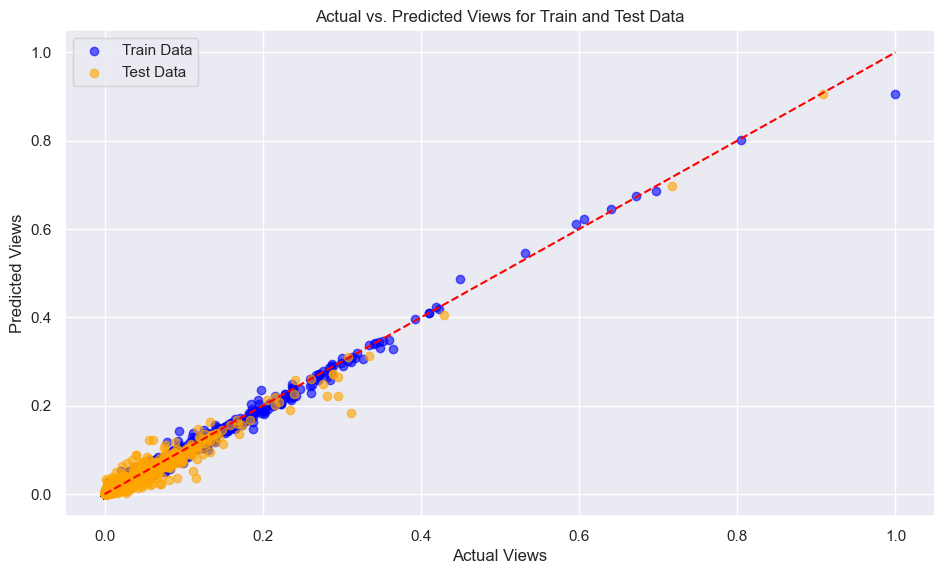

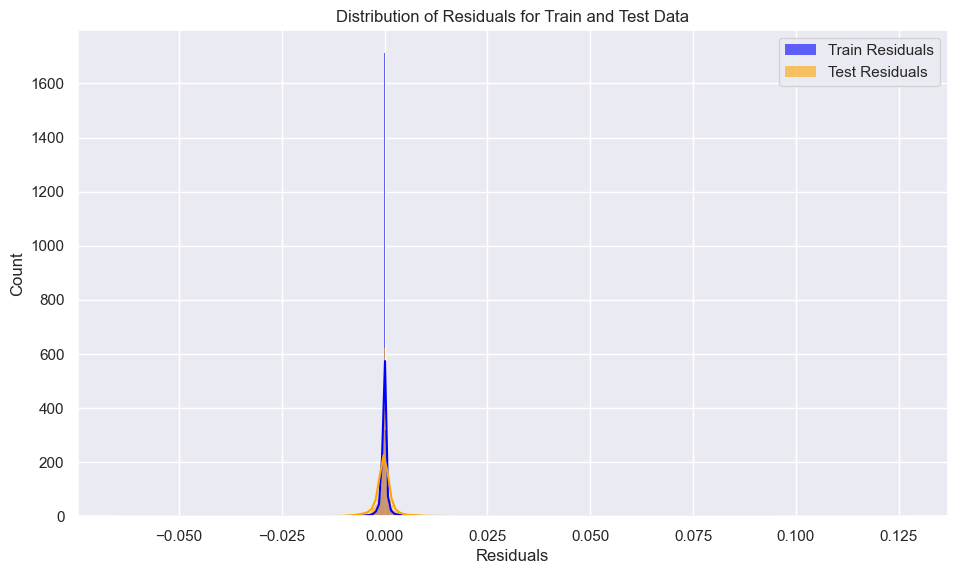

In [107]:
import matplotlib.pyplot as plt
import seaborn as sns

# Predict on both training and test sets
train_pred = rf.predict(xtrain)
test_pred = rf.predict(xtest)

# 1. Actual vs. Predicted Plot for Train and Test Data
plt.figure(figsize=(10, 6))
plt.scatter(ytrain, train_pred, color='blue', alpha=0.6, label='Train Data')
plt.scatter(ytest, test_pred, color='orange', alpha=0.6, label='Test Data')
plt.plot([min(ytrain), max(ytrain)], [min(ytrain), max(ytrain)], color='red', linestyle='--')  # y = x line
plt.xlabel('Actual Views')
plt.ylabel('Predicted Views')
plt.title('Actual vs. Predicted Views for Train and Test Data')
plt.legend()
plt.grid(True)
plt.show()

# 2. Residual Plot for Train and Test Data
train_residuals = ytrain - train_pred
test_residuals = ytest - test_pred

plt.figure(figsize=(10, 6))
sns.histplot(train_residuals, kde=True, color='blue', label='Train Residuals', alpha=0.6)
sns.histplot(test_residuals, kde=True, color='orange', label='Test Residuals', alpha=0.6)
plt.xlabel('Residuals')
plt.title('Distribution of Residuals for Train and Test Data')
plt.legend()
plt.grid(True)
plt.show()


Text(0.5, 1.0, 'feature importance score')

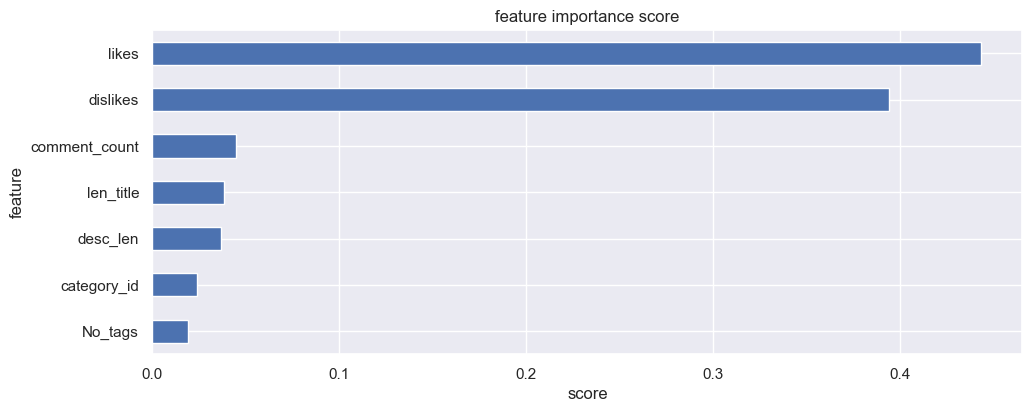

In [92]:
X=data[['category_id','likes','dislikes','comment_count','No_tags','desc_len','len_title']]
feat_importances = pd.Series(rf.feature_importances_, index=X.columns)
ax = feat_importances.nlargest(10).plot(kind='barh')
ax.invert_yaxis()
plt.xlabel('score')
plt.ylabel('feature')
plt.title('feature importance score')

# Support Vector Regressor

In [93]:
from sklearn.svm import SVR

svr = SVR()
svr.fit(xtrain, ytrain)
pred = svr.predict(xtest)
eval_regression(svr, pred, xtrain, ytrain, xtest, ytest)

MAE: 0.07
RMSE: 0.07
R2 score: -7.10


**The model's performance is very bad because the R2 value is below the 0 value, which is -6.85**

# Save Model

In [94]:
import pickle
pickle.dump(best_model1, open('RandomForest_model.pkl', 'wb'))

In [95]:
loaded_model = pickle.load(open('RandomForest_model.pkl', 'rb'))
result = loaded_model.score(xtest,ytest)
print(result)

0.9630614662962217


In [96]:
print('train accuracy : ', str(round(loaded_model.score(xtrain, ytrain)*100,2)), '%')
print('test accuracy : ', str(round(loaded_model.score(xtest, ytest)*100,2)), '%')

train accuracy :  99.37 %
test accuracy :  96.31 %


**The model we chose has very little tendency to overfitting, but we think it can be tolerated within normal reasonable limits, where the train accuracy has a value of 99,38% and the test accuracy has a value of 96,26%.**

# Conclusion

Based on the experiments conducted, several models showed promising results in predicting YouTube video views: <br>

1. **Random Forest**: Achieved the best performance with an MAE of 0.00, RMSE of 0.00, and an R² score of 0.96, making it the top model for predicting video views.<br>
2. **Decision Tree**: Ranked second with an R² score of 0.94, slightly lower than Random Forest but still demonstrating strong predictive power.<br>
3. **Randomized Search**: Secured third place with an MAE of 0.00, RMSE of 0.01, and an R² score of 0.85, indicating good performance but not as strong as the top two models.<br>
4. **Lasso**: Secured 4th place with an MAE of 0.01, RMSE of 0.01, and an R² score of 0.78, Best Alpha: 0.0001 indicating good performance but not as strong as the top two models.<br>
4. **Ridge Regression**: Followed with an MAE of 0.01, RMSE of 0.01, and an R² score of 0.77, making it a viable model, albeit less accurate compared to others.<br>
5. The most influential features for predicting video views were the number of likes and dislikes a video received.<br>

Overall, Random Forest emerged as the most effective model for predicting YouTube video views, leveraging its ability to capture complex patterns and interactions within the dataset.